<h1 align=center > Analysing and Predicting Insurance Claim </h1>

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('data/insurance_data.csv')
df.sample(5)

index  PatientID   age  gender   bmi  bloodpressure diabetic  children  \
108    108        109  26.0  female  37.4             83      Yes         0   
921    921        922  27.0    male  30.8             98       No         0   
3        3          4   NaN    male  33.7             80       No         0   
411    411        412  26.0  female  20.0             94      Yes         3   
446    446        447  25.0  female  32.5            100       No         1   

    smoker     region     claim  
108     No  northwest   2138.07  
921     No  southwest  13390.56  
3       No  northwest   1136.40  
411     No  northwest   5693.43  
446     No  southwest   6238.30

### Dimension of data

In [3]:
df.shape

(1340, 11)

### How Many Null Values

In [4]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

> **Observation:** **Age** has 5 and **region** has 3 null values 

### What type of data is?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


### Data Cleaning

In [6]:
df.drop(columns=['index','PatientID'],inplace=True)
df.head()

age gender   bmi  bloodpressure diabetic  children smoker     region  \
0  39.0   male  23.2             91      Yes         0     No  southeast   
1  24.0   male  30.1             87       No         0     No  southeast   
2   NaN   male  33.3             82      Yes         0     No  southeast   
3   NaN   male  33.7             80       No         0     No  northwest   
4   NaN   male  34.1            100       No         0     No  northwest   

     claim  
0  1121.87  
1  1131.51  
2  1135.94  
3  1136.40  
4  1137.01

### Why do EDA?

- Analysis and reporting
- Validate assumptions
- Handling missing values
- detecting outliers
- feature engineering
- Model building

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion(Spread).

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Separate out Categorical and Numerical Features

In [7]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['gender', 'diabetic', 'smoker', 'region']


In [8]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['age', 'bmi', 'bloodpressure', 'children', 'claim']


### Seperated Columns

- **Numerical** - age,bmi,bloodpressure,claim
- **Categorical** -gender, diabetic,children,smoker, region

### Uni Variant EDA

> ### Age 

> - **Missing Values** 3 
> - **Shape** Appears bimodal, with peaks around 30-35 and 40-45.
> - **Outliers** No

In [9]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [69]:
sns.set_context('paper', font_scale = 2)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

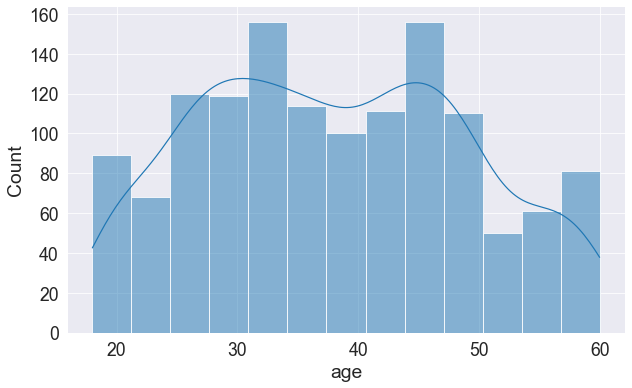

In [70]:
sns.histplot(df['age'],kde=True);

> - ###   Appears Almost binomial, with peaks around 30-35 and 40-45.

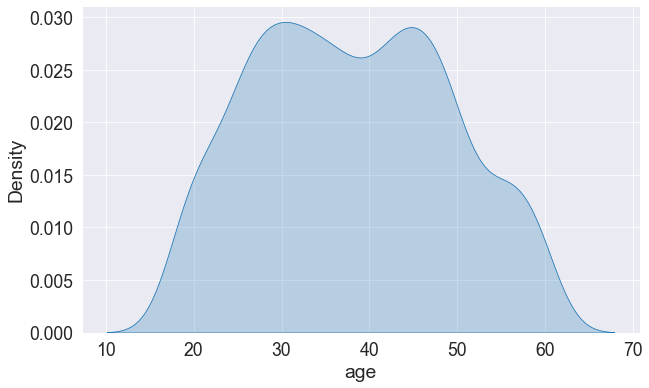

In [71]:
sns.kdeplot(df['age'],fill=True);

In [72]:
df['age'].skew()

0.11361133741072633

In [73]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [74]:
df['age'].isnull().sum()

5

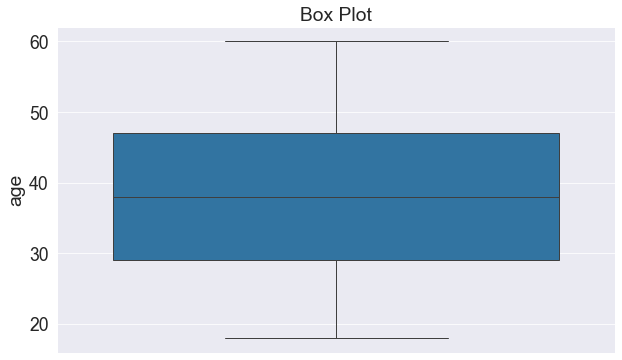

In [75]:
sns.boxplot(df['age'])
plt.title('Box Plot');

> Observation: <h3>No Outliers</h3>

### Catagorical_Data_Frame

In [76]:
cat_df = pd.DataFrame()

> ### BMI

> - **Missing Values**     0 
> - **Shape** Noraml Distriubution
. - **Outliers** 4 max 

In [77]:
df['bmi'].describe()

count    1340.000000
mean       30.662057
std         6.084026
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        48.989160
Name: bmi, dtype: float64

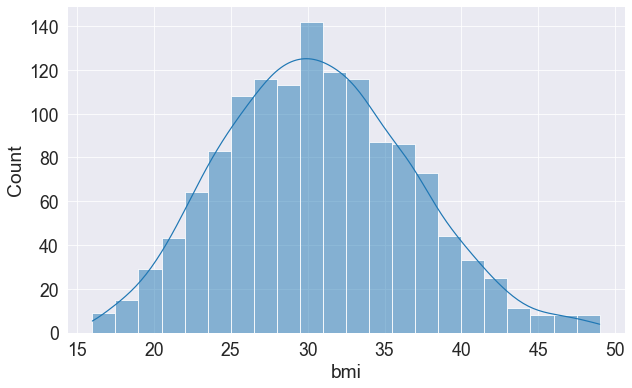

In [78]:
sns.histplot(df['bmi'],kde=True);

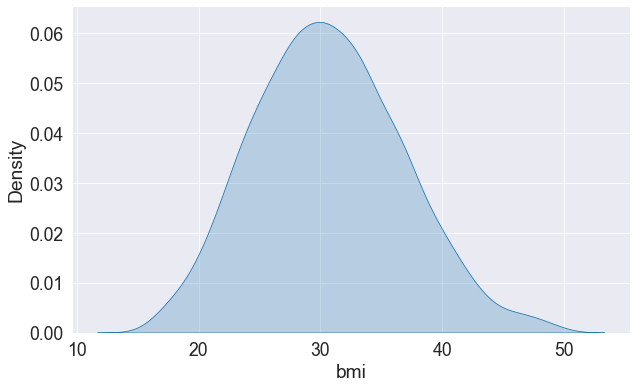

In [79]:
sns.kdeplot(df['bmi'],fill=True);

> ###  **Observation:** Normally Distributed

### Outliers Detection

In [80]:
upper_limit= df['bmi'].mean()+3*df['bmi'].std()
upper_limit

48.91413531834962

In [81]:
tmp_bmi = df['bmi']

In [82]:
df[df['bmi']>upper_limit].shape

(4, 9)

> - #### There are 4 outliers in BMI

### Removing Outliers 

In [83]:
df['bmi']= np.where(df['bmi'] >upper_limit,upper_limit,df['bmi'])

In [84]:
df[df['bmi']>upper_limit].shape

(0, 9)

> - #### There are 0 outliers After Removalo of Outliers

In [85]:
def bmi_categorizer(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Healthy"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    elif bmi >= 30 and bmi < 40:
        return "Obese"
    else:
        return "Very Obese"

cat_df['bmi'] = df['bmi'].apply(bmi_categorizer)

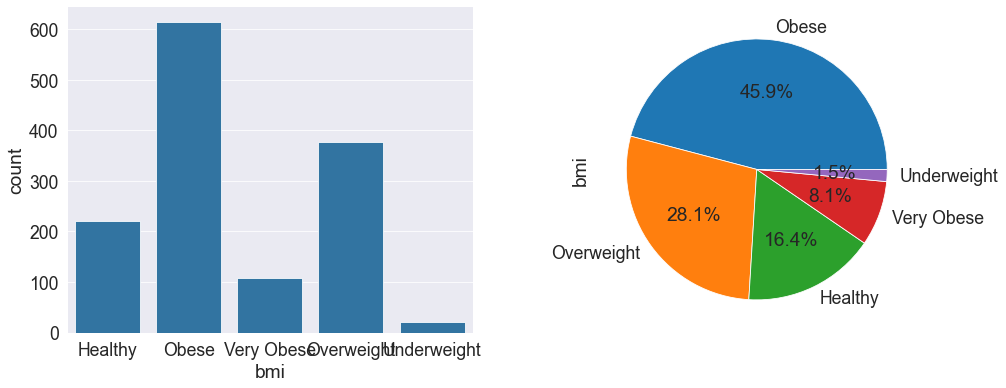

In [86]:
fig = plt.figure(figsize=(16,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bmi'],ax=ax1)
cat_df['bmi'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

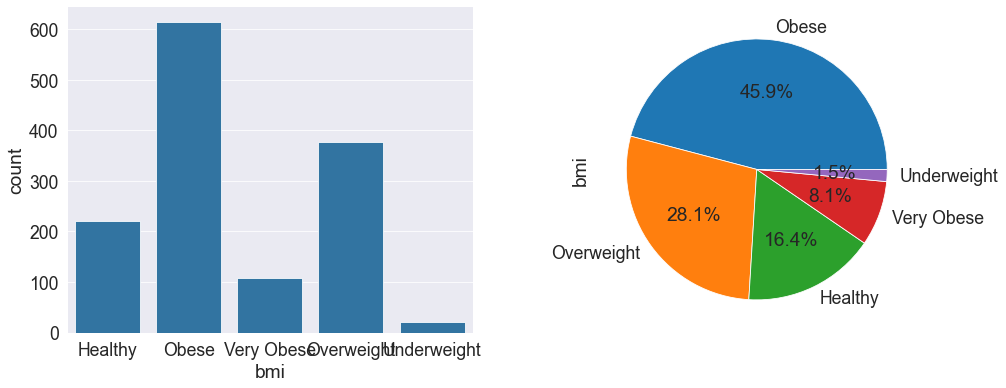

In [87]:
fig = plt.figure(figsize=(16,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bmi'],ax=ax1)
cat_df['bmi'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

> ### BMI Observations
> - #### Normally distributed with 4 outliers.
> - #### Predominantly obese patients and very few underweight individuals.

### Blood Pressure

- **Missing Values**     0 
- **Shape** Highly Positive Skewed
- **Outliers** 4.6 % Outliers 

In [88]:
df['bloodpressure'].describe()

count    1340.000000
mean       93.645522
std         9.893274
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       118.500000
Name: bloodpressure, dtype: float64

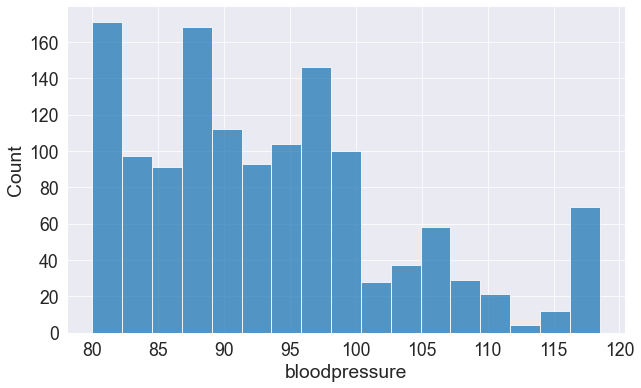

In [89]:
sns.histplot(df['bloodpressure']);

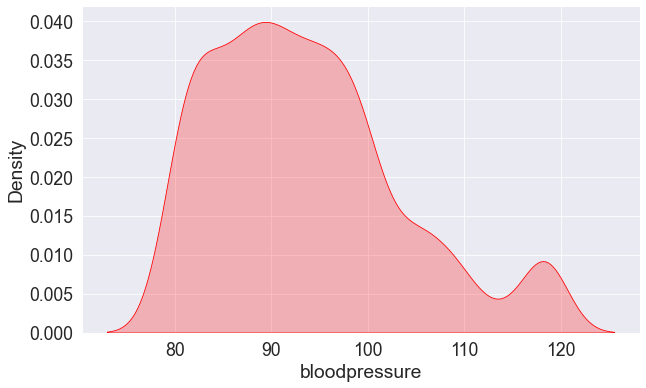

In [90]:
sns.kdeplot(df['bloodpressure'], fill=True, color='red', cbar=True);

In [91]:
df['bmi'].max()

48.91413531834962

In [92]:
df['bloodpressure'].skew()

0.7896766181785638

In [93]:
def bp_categorizer(bp):
    if 80<=bp < 89:
        return "elevated"
    elif 90<= bp <= 99:
        return "High"
    elif  99< bp <100:
        return "very high"
    elif 100<=bp<120:
        return "extremely high"
    else:
        return "fatal"

cat_df['bloodpressure'] = df['bloodpressure'].apply(bp_categorizer)

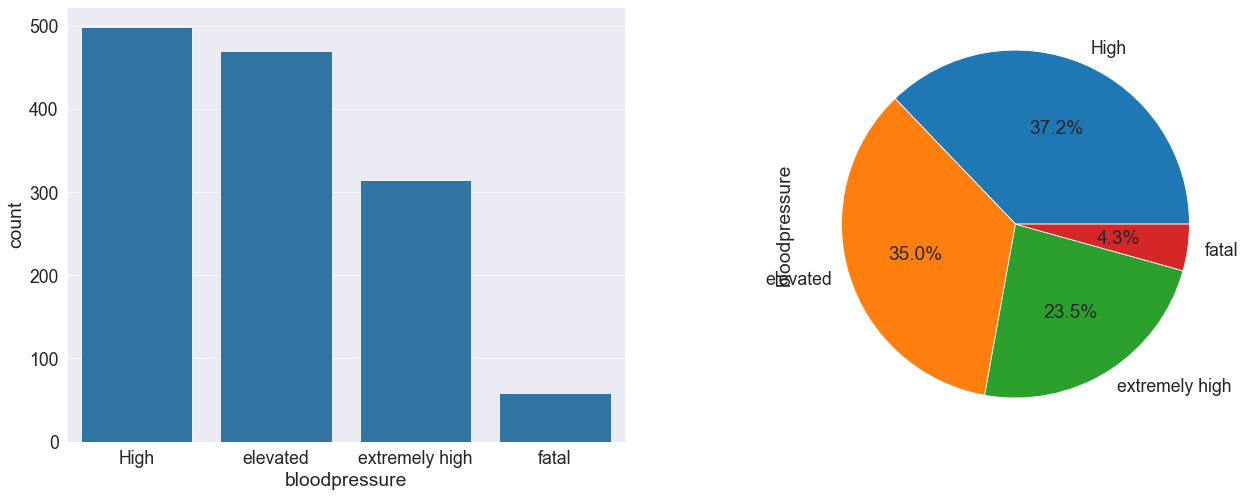

In [94]:
fig = plt.figure(figsize=(22,8))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=cat_df['bloodpressure'],ax=ax1)
cat_df['bloodpressure'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);


> ### Blood Pressure Distribution

> - #### Highly positively skewed.
> - #### Approximately 35% of patients exhibit elevated BP, while 4.3% are in a critical state (fatal).


### Outliers Detection

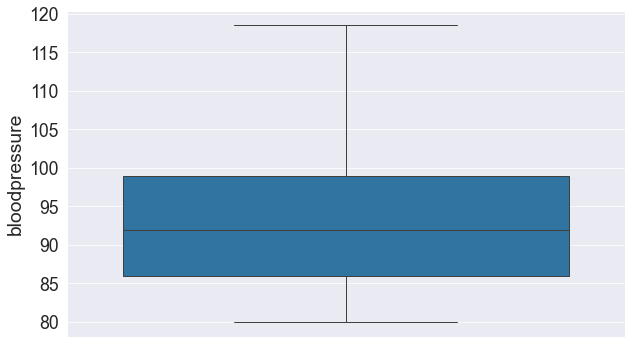

In [95]:
sns.boxplot(df['bloodpressure']);

In [96]:
df.shape

(1340, 9)

### Removing Outliers 

In [97]:
iqr = df['bloodpressure'].quantile(0.75) - df['bloodpressure'].quantile(0.25)
upper_limit= df['bloodpressure'].quantile(0.75) + iqr *1.5
df[df['bloodpressure']>upper_limit].shape

(0, 9)

In [98]:
tmp_bp = df['bloodpressure']

In [99]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

0.0

> #### - There are 62 Outliers in BloodPressure Column Which Is 4% of the data 

In [100]:
df['bloodpressure']= np.where(df['bloodpressure'] >upper_limit,upper_limit,df['bloodpressure'])

### After Removal of Outliers

In [101]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

0.0

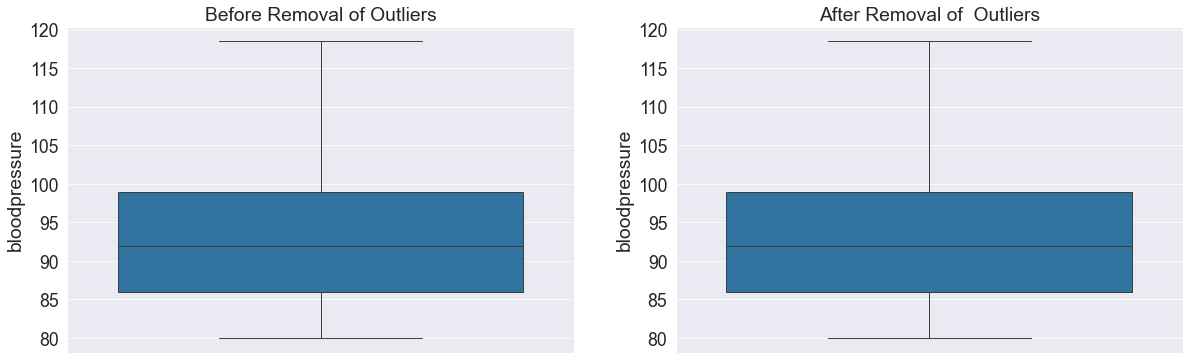

In [102]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp_bp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['bloodpressure'],ax=ax2);

### claim

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [103]:
df['claim'].describe()

count     1340.000000
mean     12456.807377
std      10146.288723
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      34431.235000
Name: claim, dtype: float64

In [104]:
df['claim'].skew()

1.0821857516434994

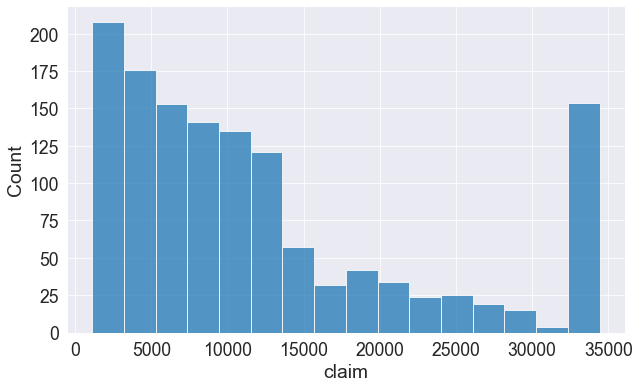

In [105]:
sns.histplot(df['claim']);

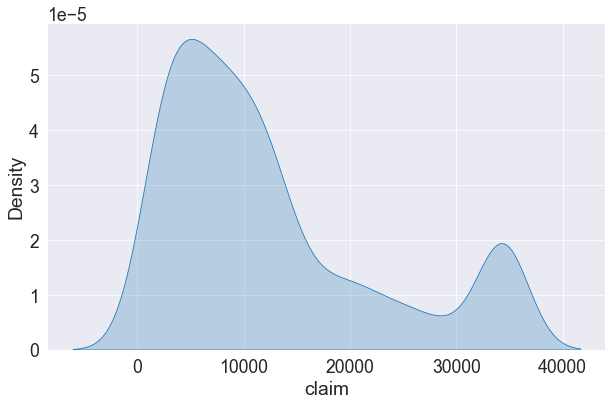

In [106]:
sns.kdeplot(df['claim'],fill=True);

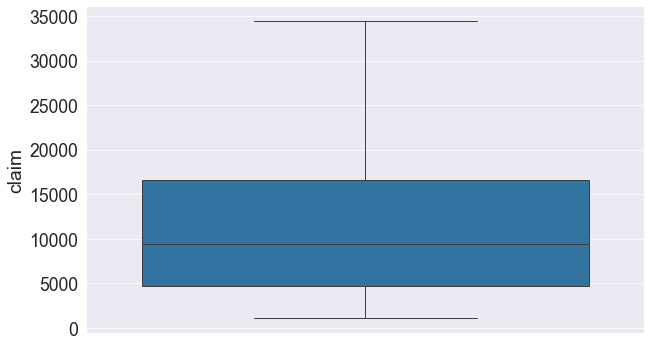

In [107]:
sns.boxplot(df['claim']);

> ### Claim

> - #### Outliers are 10% of the data.
> - #### highly positively skewed nature.

### Removing Outliers 

In [108]:
iqr = df['claim'].quantile(0.75) - df['claim'].quantile(0.25)
upper_limit= df['claim'].quantile(0.75) + iqr *1.5
df[df['claim']>upper_limit].shape[0]

0

In [109]:
(df[df['claim']>upper_limit].shape[0]/df.shape[0])*100

0.0

- There are 141 Outliers in Claim  Which Is 10% of the data 

In [110]:
tmp_claim = df['claim']

In [111]:
df['claim']= np.where(df['claim'] >upper_limit,upper_limit,df['claim'])

### After Removing Outliers 

In [112]:
df[df['claim']>upper_limit].shape[0]

0

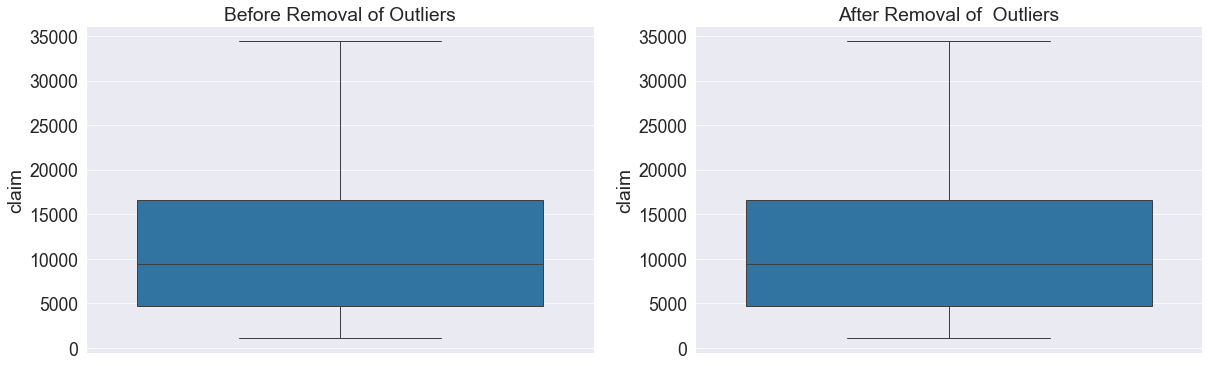

In [113]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp_claim,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['claim'],ax=ax2);

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Catagorical Columns
- Gender
- diabetic
- Region
- smoker

In [114]:
df['gender'].value_counts()

male      678
female    662
Name: gender, dtype: int64

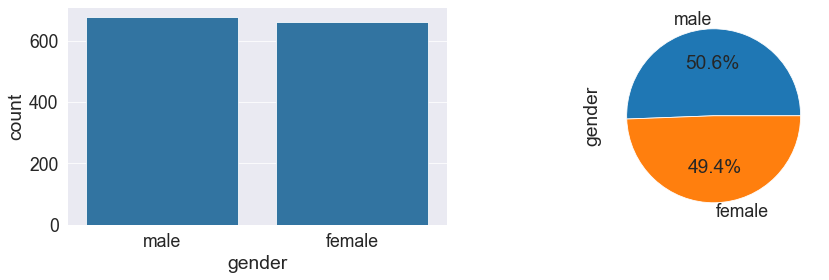

In [115]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['gender'],ax=ax1)
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

> ### Key Insights:

> 1. **Gender Balance:**
   - The dataset exhibits a nearly equal distribution between male and female categories, with a slight majority (50.6%) being > male.

> 2. **Implications:**
>   - This balanced gender representation may indicate a well-diversified dataset, potentially reducing the risk of gender 
> related biases in subsequent analyses.

In [116]:
df['diabetic'].value_counts()

No     698
Yes    642
Name: diabetic, dtype: int64

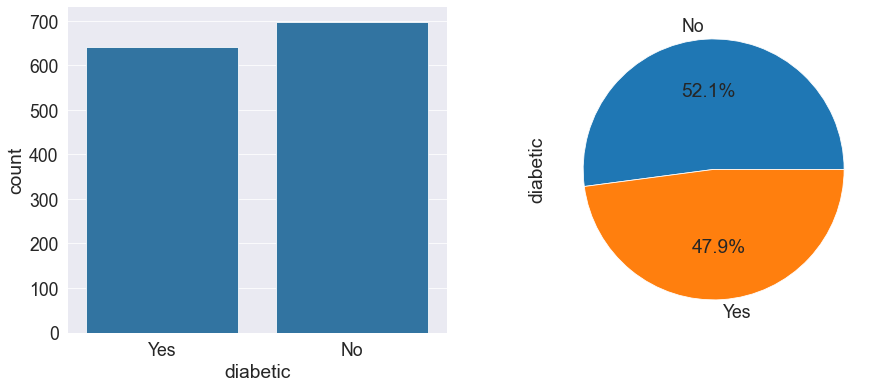

In [117]:
fig = plt.figure(figsize=(15,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['diabetic'],ax=ax1)
df['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2);

### 1. **Observations:**
  - ####  A significant proportion, accounting for 47.9% of individuals, report having diabetes.


In [118]:
df['children'].value_counts()

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

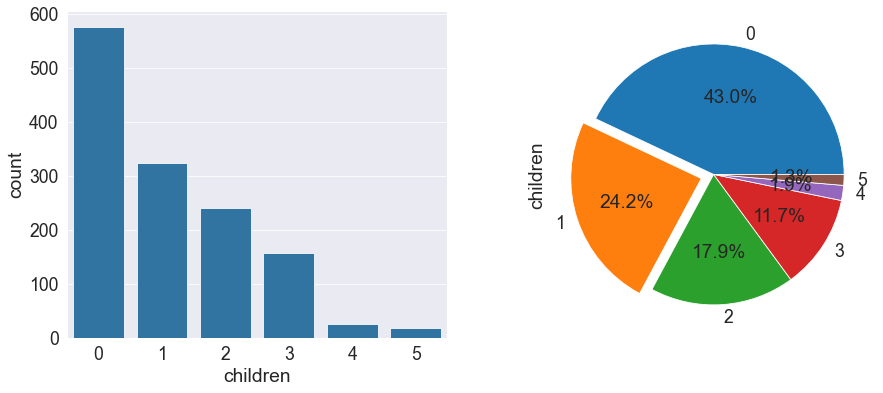

In [119]:
fig = plt.figure(figsize=(15,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['children'],ax=ax1)
df['children'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1,0,0,0,0]);

### **Key Observations**
- Majority Without Children:
- A significant portion of individuals in the dataset (576) do not have any children.
- Diversity in Family Sizes:
- The dataset includes individuals with varying family sizes, ranging from one to five children.

In [120]:
df['smoker'].value_counts()

No     1066
Yes     274
Name: smoker, dtype: int64

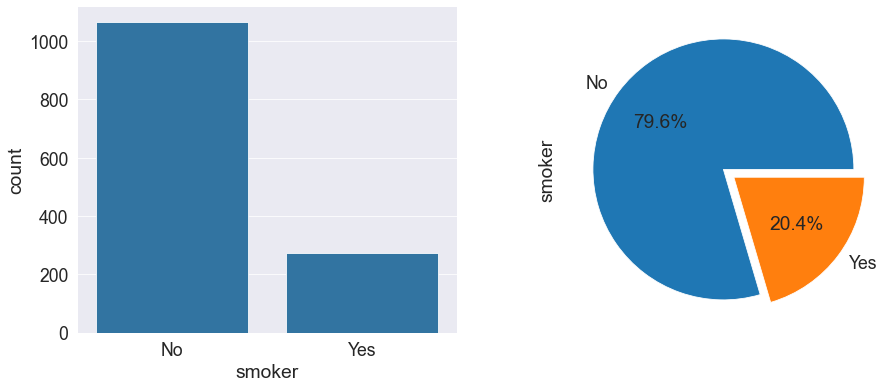

In [121]:
fig = plt.figure(figsize=(15,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['smoker'],ax=ax1)
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1]);

### Observations

- #### The dataset reveals that approximately 20.6% of individuals identify as smokers.


In [122]:
df['region'].value_counts()

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

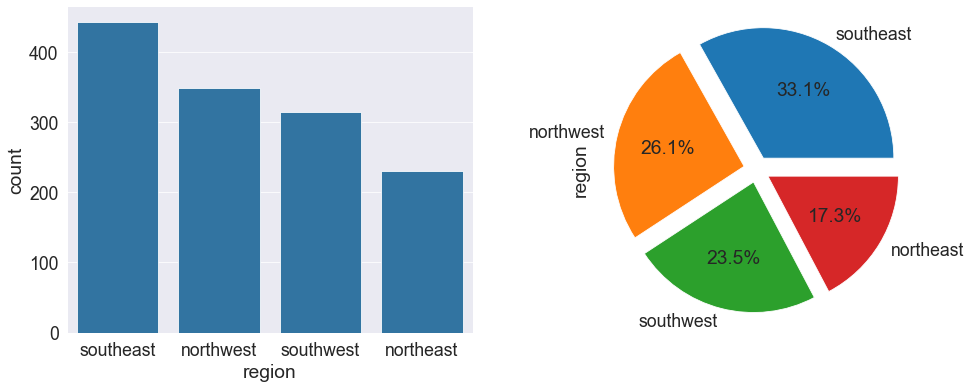

In [123]:
fig = plt.figure(figsize=(16,6))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['region'],ax=ax1)
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0.1]*4);

### Key Observations

### High Representation in Southeast:

- The dataset has a notable concentration of individuals from the Southeast region, with 443 individuals.

### Balanced Distribution:

- While there is variation, the dataset maintains a reasonably balanced distribution across the Northwest, Southwest, and Northeast regions.

---


<h2 align='center'> Bi Variate Exploratory Data Analysis</h3>

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
        

### Cat to Cat
- gender with diabetic
- gender with children
- gender with smoker
- gender with region
- bmi_cat with bloodpressure
- bloodpressure_cat with  claim

In [124]:
pd.crosstab(df['gender'],df['diabetic'])

diabetic   No  Yes
gender            
female    339  323
male      359  319

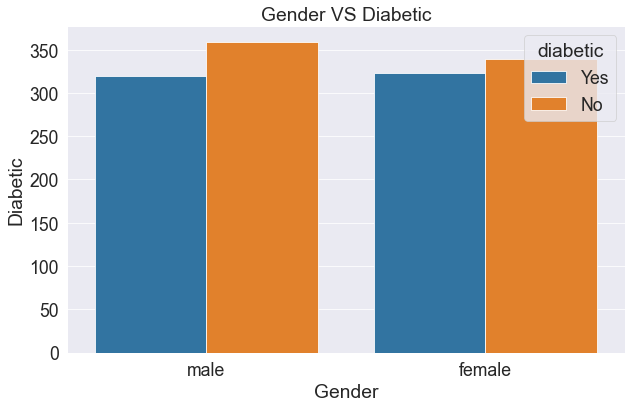

In [125]:
sns.countplot(x=df['gender'],hue=df['diabetic'])
plt.xlabel('Gender')
plt.ylabel('Diabetic')
plt.title('Gender VS Diabetic')
plt.show();

In [126]:
pd.crosstab(df['gender'],df['smoker'])

smoker   No  Yes
gender          
female  547  115
male    519  159

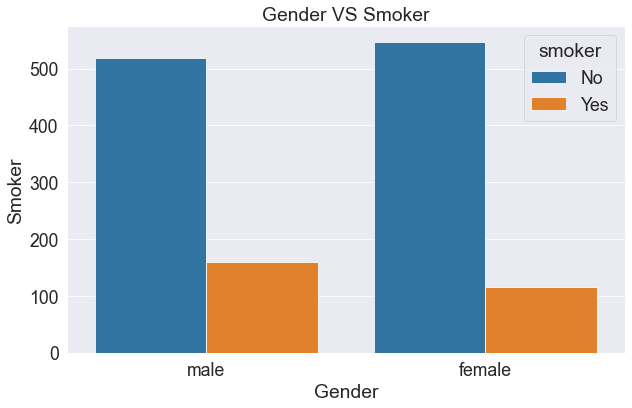

In [127]:
sns.countplot(x=df['gender'],hue=df['smoker'])
plt.xlabel('Gender')
plt.ylabel('Smoker')
plt.title('Gender VS Smoker')
plt.show();

In [128]:
pd.crosstab(df['gender'],df['region'])

region  northeast  northwest  southeast  southwest
gender                                            
female        112        164        224        162
male          119        185        219        152

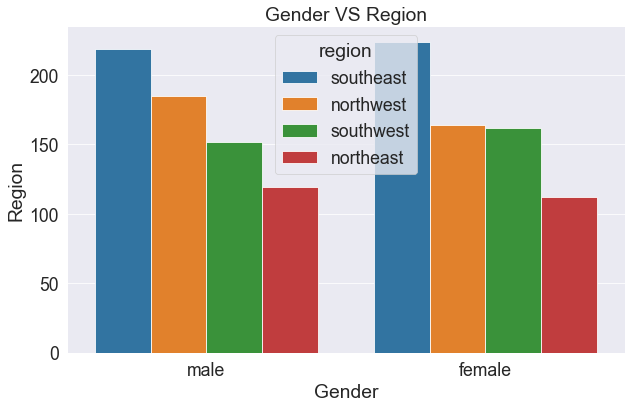

In [129]:
sns.countplot(x=df['gender'],hue=df['region'])
plt.xlabel('Gender')
plt.ylabel('Region')
plt.title('Gender VS Region')
plt.show();

In [130]:
pd.crosstab(df['gender'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
gender                                              
female          249       235             155     23
male            249       234             160     35

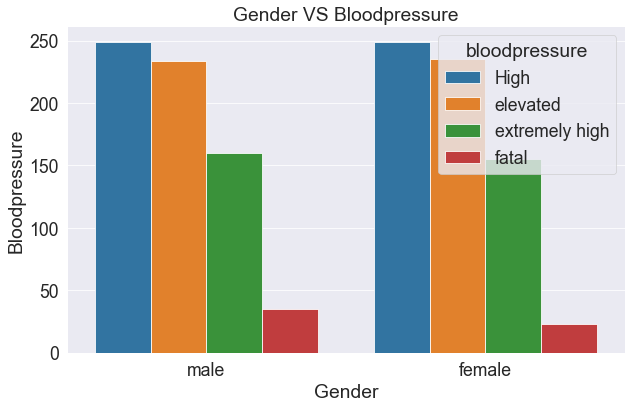

In [131]:
sns.countplot(x=df['gender'],hue=cat_df['bloodpressure'])
plt.xlabel('Gender')
plt.ylabel('Bloodpressure')
plt.title('Gender VS Bloodpressure')
plt.show();

In [132]:
pd.crosstab(df['gender'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
gender                                                     
female      114    293         191           12          52
male        106    322         186            8          56

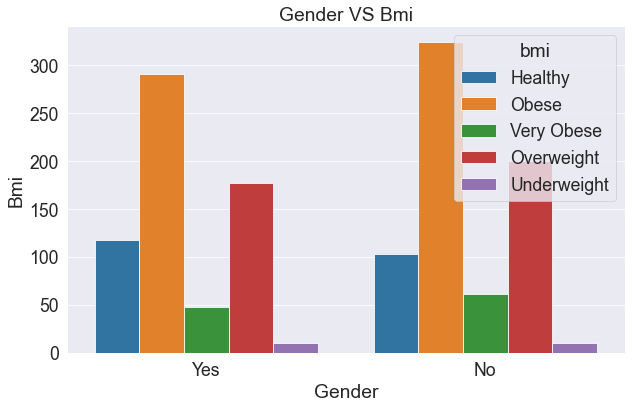

In [133]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('Gender')
plt.ylabel('Bmi')
plt.title('Gender VS Bmi')
plt.show()

In [134]:
pd.crosstab(df['diabetic'],df['smoker'])

smoker     No  Yes
diabetic          
No        560  138
Yes       506  136

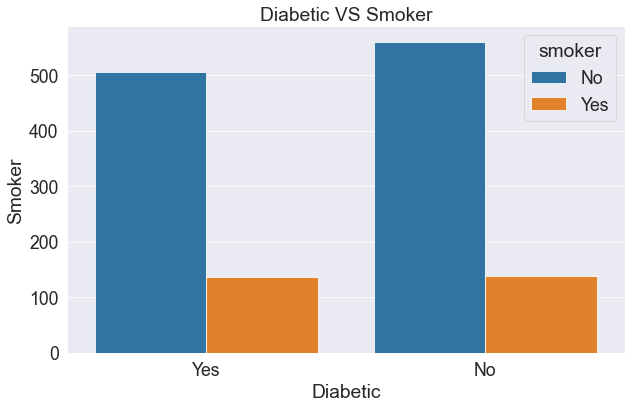

In [135]:
sns.countplot(x=df['diabetic'],hue=df['smoker'])
plt.xlabel('Diabetic')
plt.ylabel('Smoker')
plt.title('Diabetic VS Smoker')
plt.show();

In [136]:
pd.crosstab(df['diabetic'],df['children'])

children    0    1    2   3   4   5
diabetic                           
No        292  179  120  83  13  11
Yes       284  145  120  74  12   7

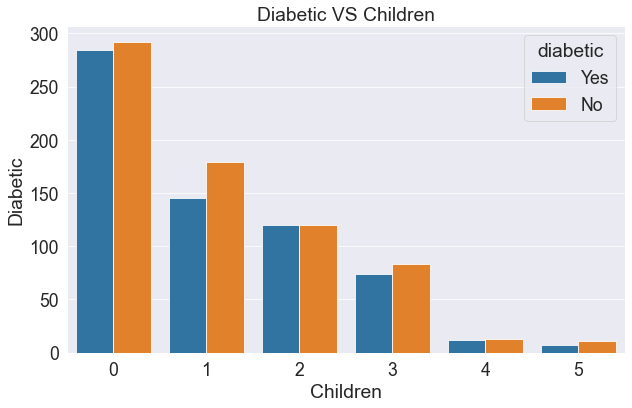

In [137]:
sns.countplot(hue=df['diabetic'],x=df['children'])
plt.xlabel('Children')
plt.ylabel('Diabetic')
plt.title('Diabetic VS Children')
plt.show()

In [138]:
pd.crosstab(df['diabetic'],df['region'])

region    northeast  northwest  southeast  southwest
diabetic                                            
No              110        192        225        170
Yes             121        157        218        144

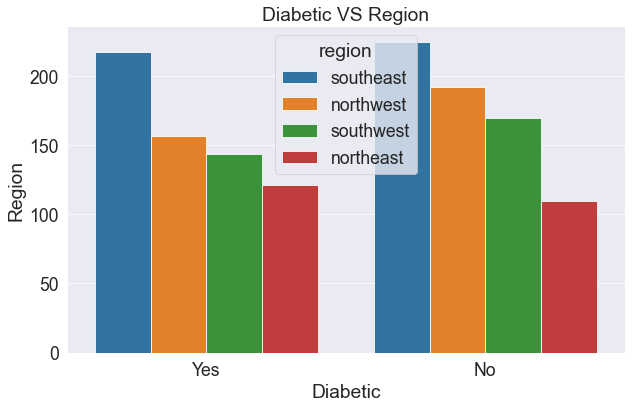

In [139]:
sns.countplot(x=df['diabetic'],hue=df['region'])
plt.xlabel('Diabetic')
plt.ylabel('Region')
plt.title('Diabetic VS Region')
plt.show()

In [140]:
pd.crosstab(df['diabetic'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
diabetic                                            
No              282       231             156     29
Yes             216       238             159     29

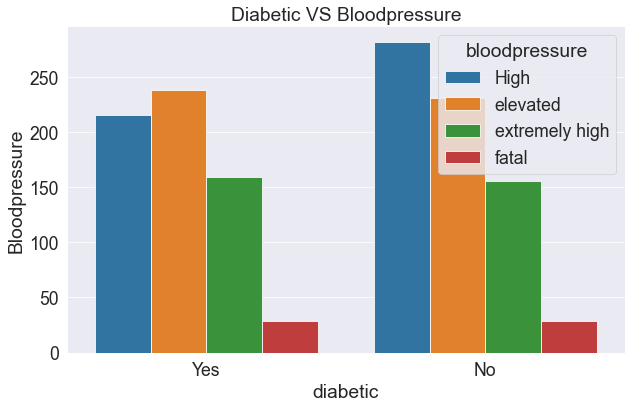

In [141]:
sns.countplot(x=df['diabetic'],hue=cat_df['bloodpressure'])
plt.xlabel('diabetic')
plt.ylabel('Bloodpressure')
plt.title('Diabetic VS Bloodpressure')
plt.show()

In [142]:
pd.crosstab(df['diabetic'],cat_df['bmi'])

bmi       Healthy  Obese  Overweight  Underweight  Very Obese
diabetic                                                     
No            103    324         200           10          61
Yes           117    291         177           10          47

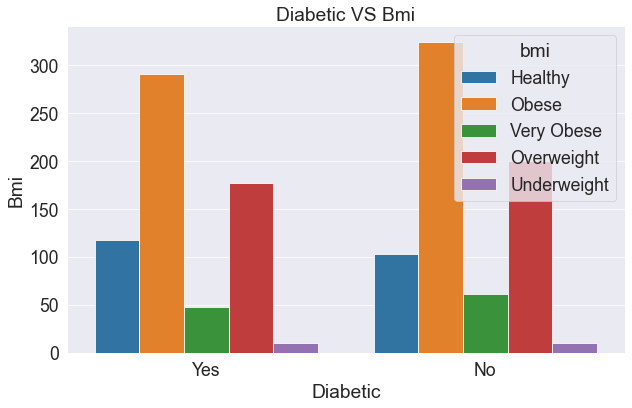

In [143]:
sns.countplot(x=df['diabetic'],hue=cat_df['bmi'])
plt.xlabel('Diabetic')
plt.ylabel('Bmi')
plt.title('Diabetic VS Bmi')
plt.show()

In [144]:
pd.crosstab(df['smoker'],df['children'])

children    0    1    2    3   4   5
smoker                              
No        461  263  185  118  22  17
Yes       115   61   55   39   3   1

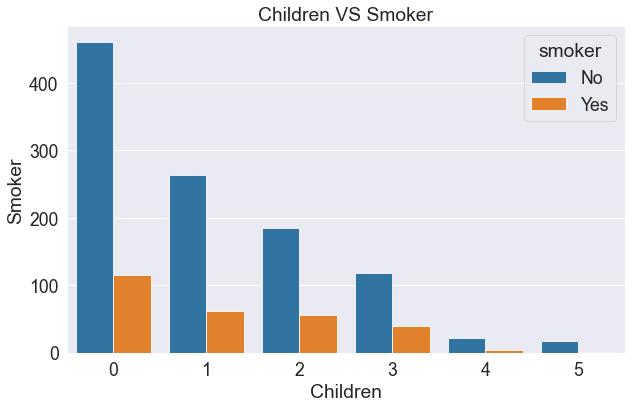

In [145]:
sns.countplot(hue=df['smoker'],x=df['children'])
plt.xlabel('Children')
plt.ylabel('Smoker')
plt.title('Children VS Smoker')
plt.show();

In [146]:
pd.crosstab(df['region'],df['smoker'])

smoker      No  Yes
region             
northeast  164   67
northwest  291   58
southeast  352   91
southwest  256   58

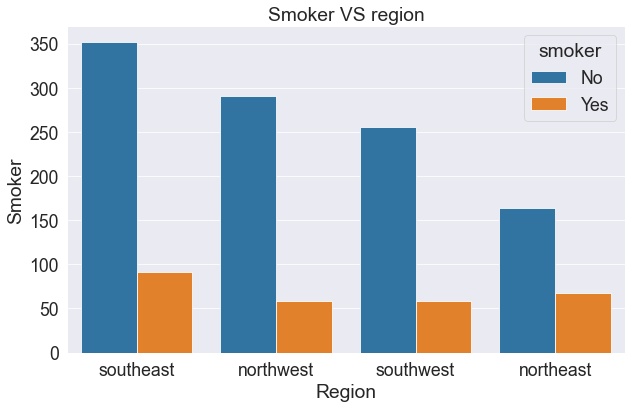

In [147]:
sns.countplot(hue=df['smoker'],x=df['region'])
plt.xlabel('Region')
plt.ylabel('Smoker')
plt.title('Smoker VS region')
plt.show()

In [148]:
pd.crosstab(df['smoker'],cat_df['bloodpressure'])

bloodpressure  High  elevated  extremely high  fatal
smoker                                              
No              437       411             168     50
Yes              61        58             147      8

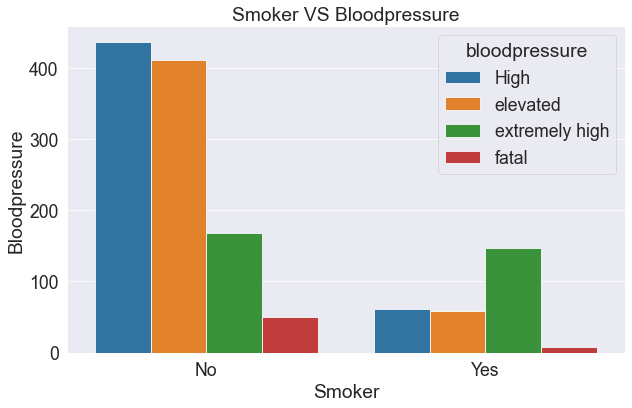

In [149]:
sns.countplot(x=df['smoker'],hue=cat_df['bloodpressure'])
plt.xlabel('Smoker')
plt.ylabel('Bloodpressure')
plt.title('Smoker VS Bloodpressure')
plt.show()

In [150]:
pd.crosstab(df['smoker'],cat_df['bmi'])

bmi     Healthy  Obese  Overweight  Underweight  Very Obese
smoker                                                     
No          171    491         305           15          84
Yes          49    124          72            5          24

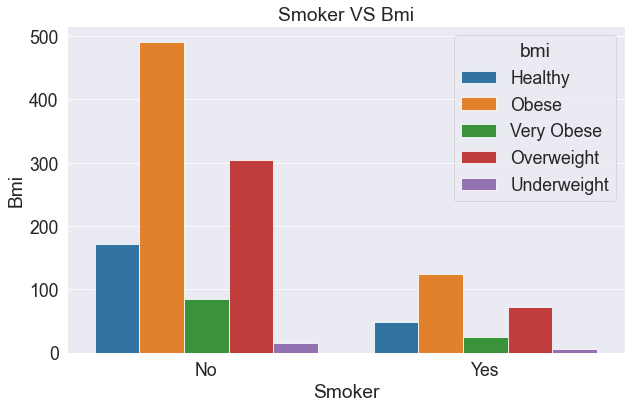

In [151]:
sns.countplot(x=df['smoker'],hue=cat_df['bmi'])
plt.xlabel('Smoker')
plt.ylabel('Bmi')
plt.title('Smoker VS Bmi')
plt.show()

### Catagorical and Numerical Columns

- gender with bmi
- gender with bloodpressure
- gender with claim
- diabetic with bmi
- diabetic with bloodpressure
- diabetic with claim
- smoker with bmi
- smoker with bloodpressure
- smoker with claim
- region with bmi
- region with bloodpressure
- region with claim
- cat_bmi with claim
- cat_bloodpressure with claim

In [152]:
sns.set_context('paper', font_scale = 2.3)

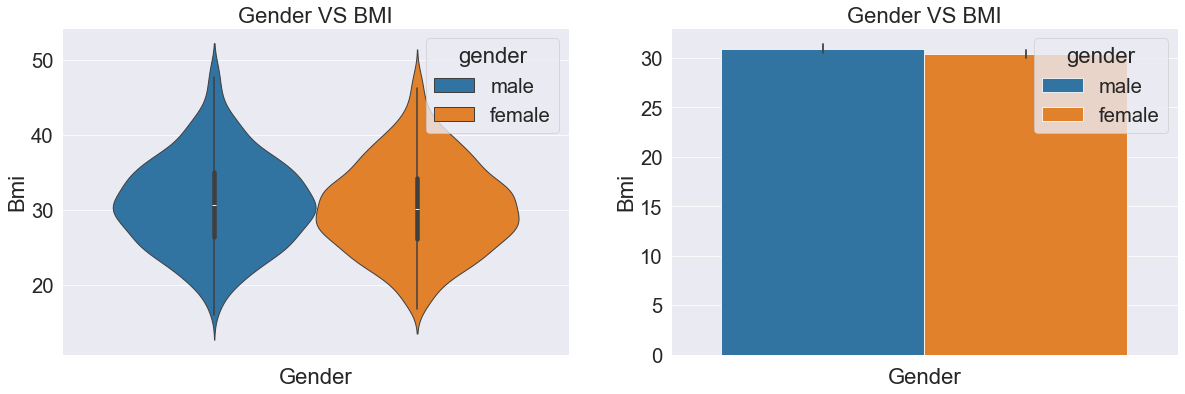

In [153]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['gender'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Bmi')
ax1.set_title('Gender VS BMI')

sns.barplot(hue=df['gender'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Bmi')
ax2.set_title('Gender VS BMI');

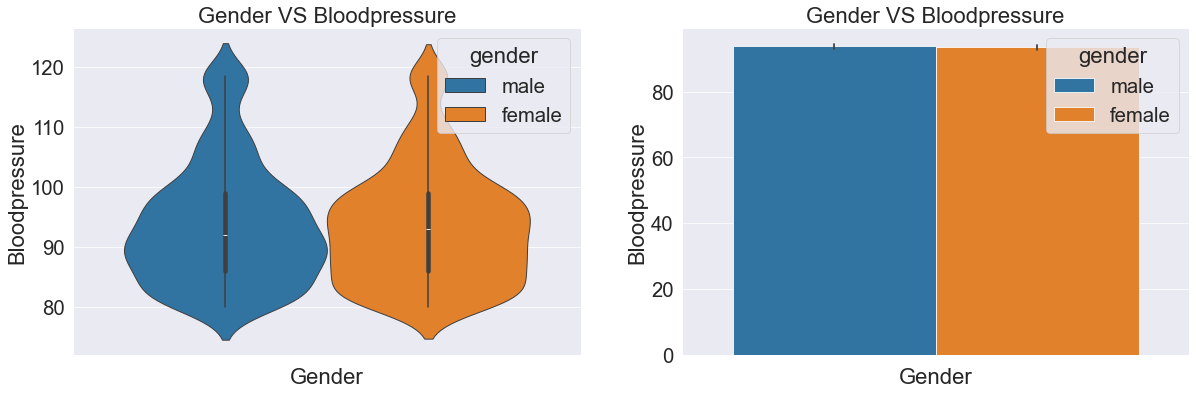

In [154]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['gender'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Gender VS Bloodpressure')

sns.barplot(hue=df['gender'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Gender VS Bloodpressure');

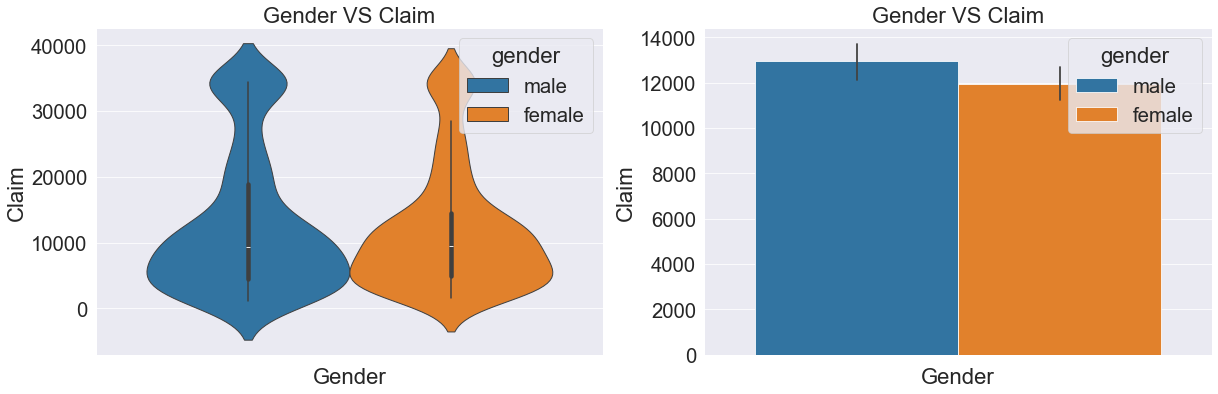

In [155]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['gender'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Claim')
ax1.set_title('Gender VS Claim')

sns.barplot(hue=df['gender'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Claim')
ax2.set_title('Gender VS Claim');

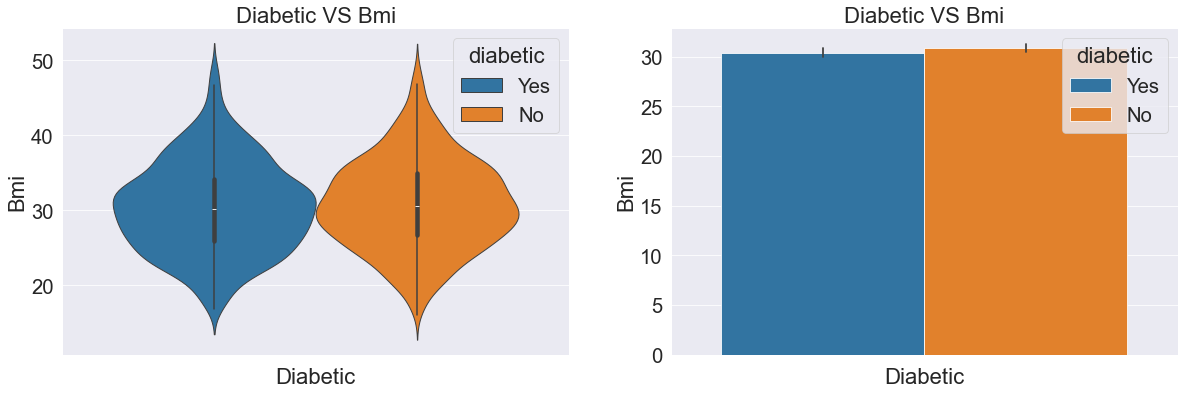

In [156]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['diabetic'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('Bmi')
ax1.set_title('Diabetic VS Bmi')

sns.barplot(hue=df['diabetic'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Bmi')
ax2.set_title('Diabetic VS Bmi');

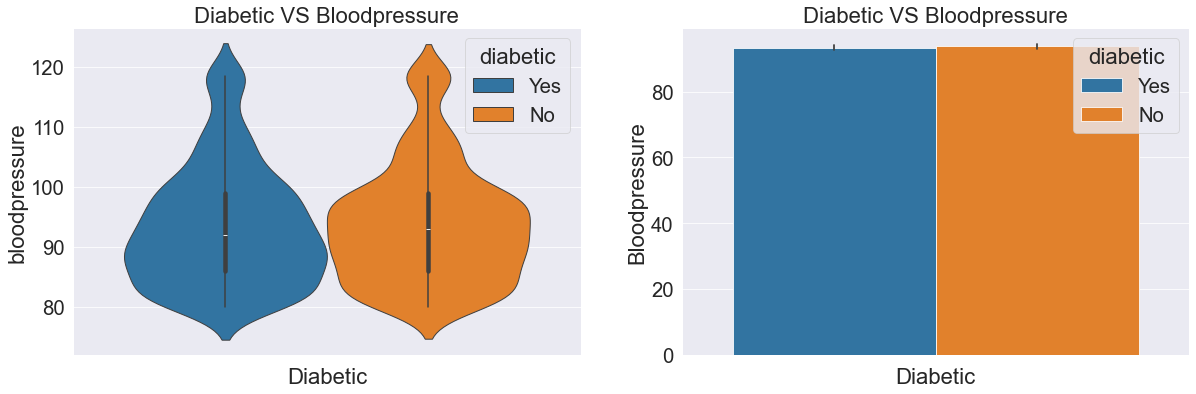

In [157]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['diabetic'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('bloodpressure')
ax1.set_title('Diabetic VS Bloodpressure')
sns.barplot(hue=df['diabetic'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Diabetic VS Bloodpressure');

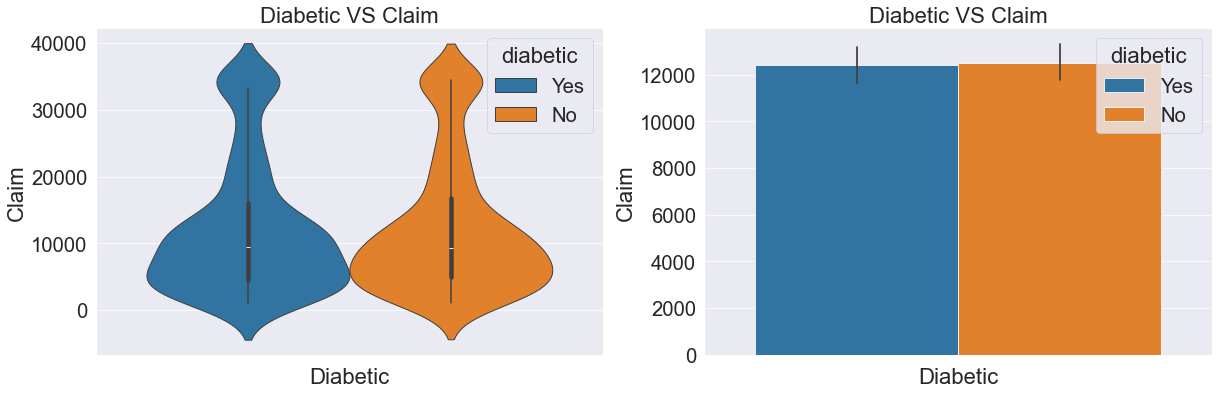

In [158]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['diabetic'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Diabetic')
ax1.set_ylabel('Claim')
ax1.set_title('Diabetic VS Claim')
sns.barplot(hue=df['diabetic'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Diabetic')
ax2.set_ylabel('Claim')
ax2.set_title('Diabetic VS Claim');

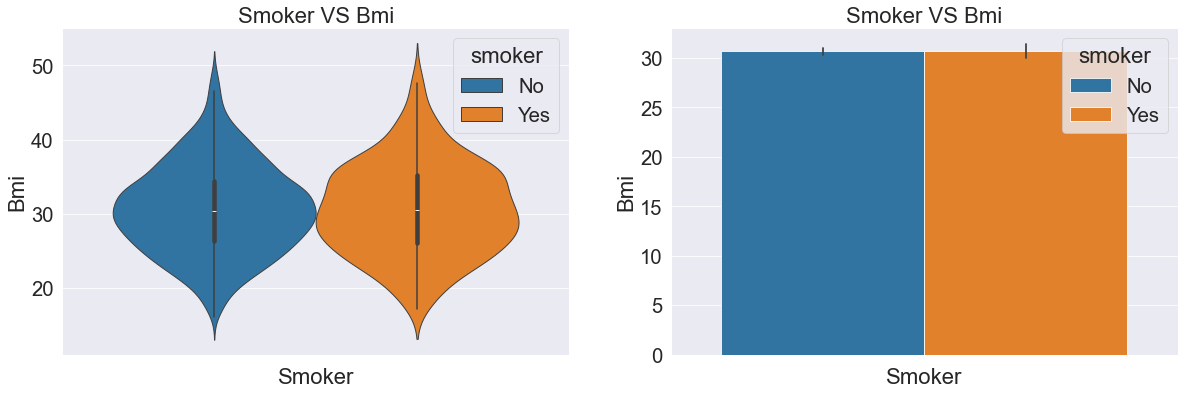

In [159]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['smoker'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Smoker')
ax1.set_ylabel('Bmi')
ax1.set_title('Smoker VS Bmi')
sns.barplot(hue=df['smoker'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Bmi')
ax2.set_title('Smoker VS Bmi');

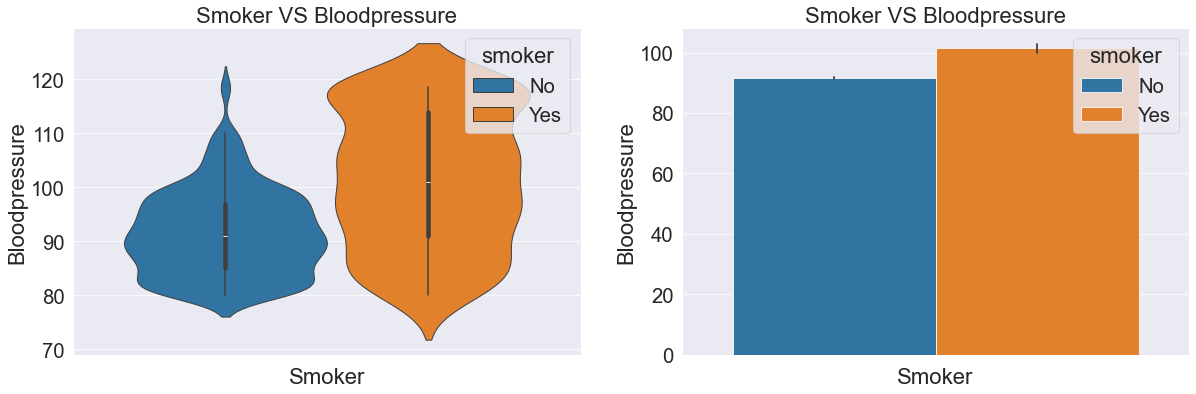

In [160]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['smoker'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Smoker')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Smoker VS Bloodpressure')
sns.barplot(hue=df['smoker'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Smoker VS Bloodpressure');

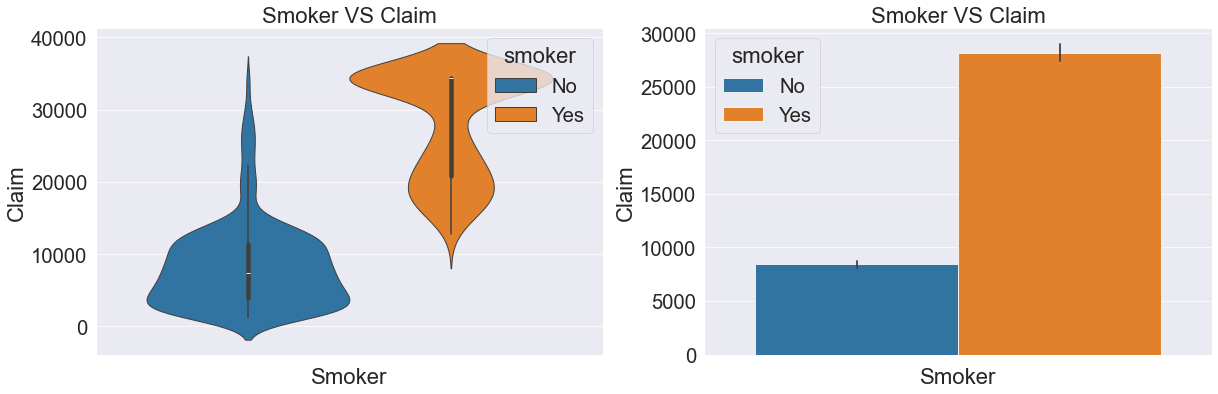

In [161]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['smoker'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Smoker')
ax1.set_ylabel('Claim')
ax1.set_title('Smoker VS Claim')
sns.barplot(hue=df['smoker'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Smoker')
ax2.set_ylabel('Claim')
ax2.set_title('Smoker VS Claim');

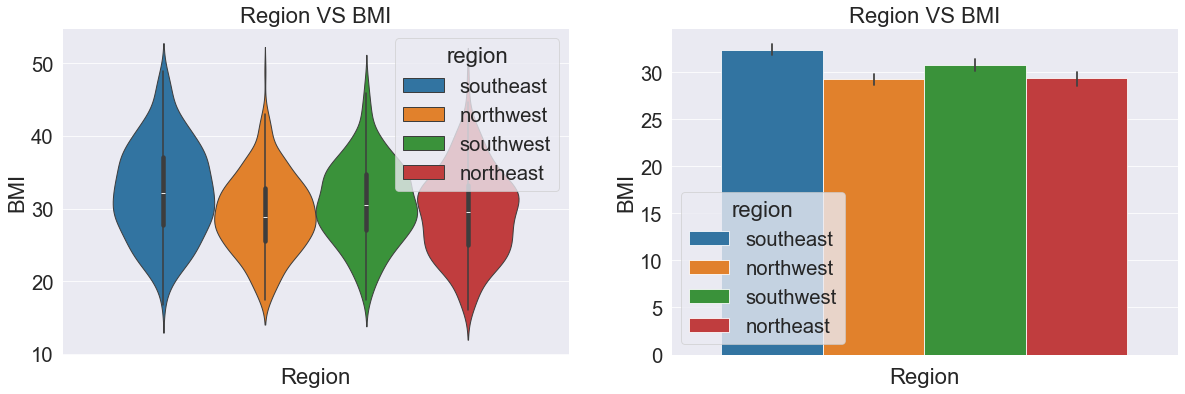

In [162]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['region'],y=df['bmi'],ax=ax1)
ax1.set_xlabel('Region')
ax1.set_ylabel('BMI')
ax1.set_title('Region VS BMI')
sns.barplot(hue=df['region'],y=df['bmi'],ax=ax2)
ax2.set_xlabel('Region')
ax2.set_ylabel('BMI')
ax2.set_title('Region VS BMI');

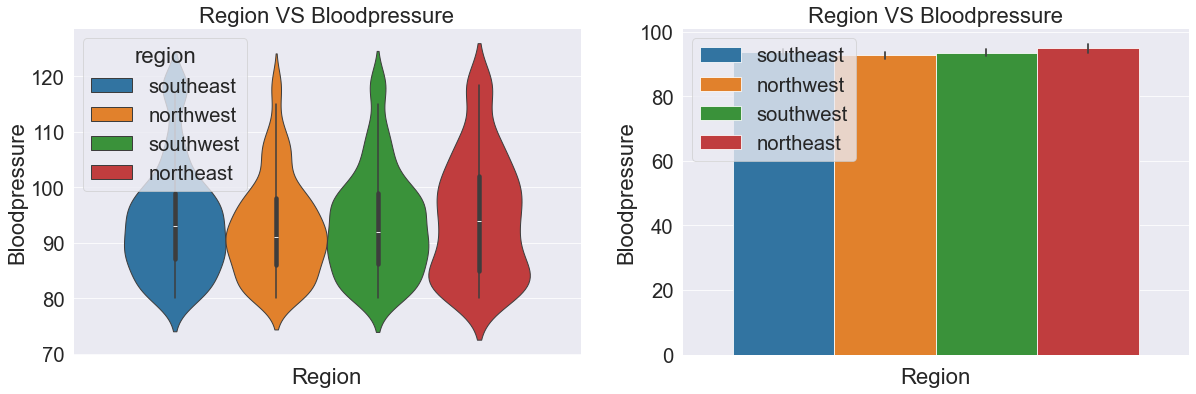

In [163]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['region'],y=df['bloodpressure'],ax=ax1)
ax1.set_xlabel('Region')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Region VS Bloodpressure')
sns.barplot(hue=df['region'],y=df['bloodpressure'],ax=ax2)
ax2.set_xlabel('Region')
ax2.set_ylabel('Bloodpressure')
ax2.set_title('Region VS Bloodpressure');
plt.legend(loc='upper left');

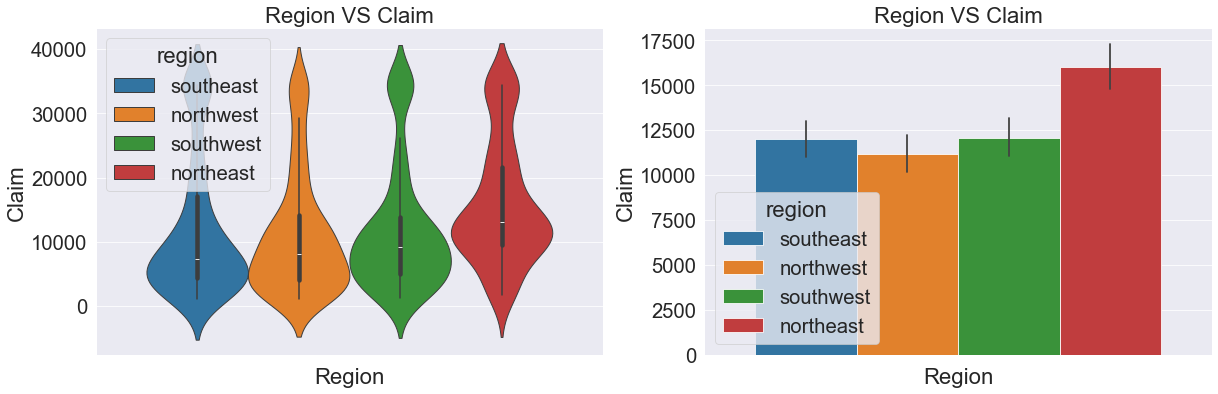

In [164]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=df['region'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Region')
ax1.set_ylabel('Claim')
ax1.set_title('Region VS Claim')
sns.barplot(hue=df['region'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Region')
ax2.set_ylabel('Claim')
ax2.set_title('Region VS Claim');

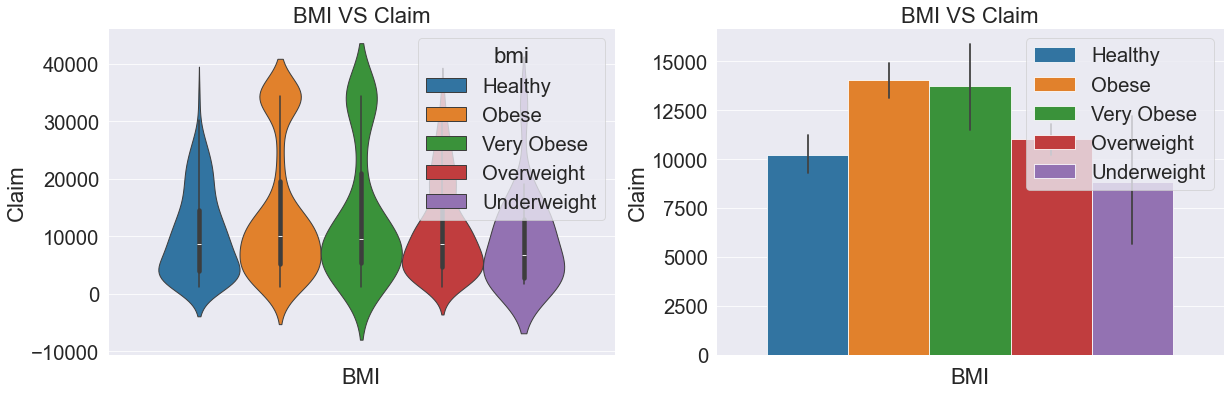

In [165]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=cat_df['bmi'],y=df['claim'],ax=ax1)
ax1.set_xlabel('BMI')
ax1.set_ylabel('Claim')
ax1.set_title('BMI VS Claim')
sns.barplot(hue=cat_df['bmi'],y=df['claim'],ax=ax2)
plt.legend(loc='upper right')
ax2.set_xlabel('BMI')
ax2.set_ylabel('Claim')
ax2.set_title('BMI VS Claim');

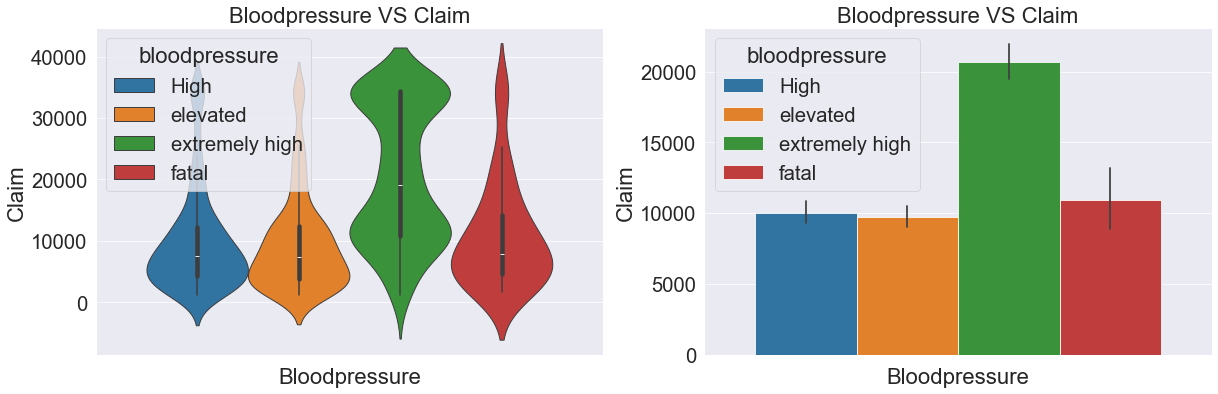

In [166]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(hue=cat_df['bloodpressure'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Bloodpressure')
ax1.set_ylabel('Claim')
ax1.set_title('Bloodpressure VS Claim')

sns.barplot(hue=cat_df['bloodpressure'],y=df['claim'],ax=ax2)
ax2.set_xlabel('Bloodpressure')
ax2.set_ylabel('Claim')
ax2.set_title('Bloodpressure VS Claim');

# Num to Num
- Age with bmi
- Age with bloodpressure
- Age with claim
- bmi with claim
- bmi with bloodpressure
- bloodpressure with  claim



## Age Vs BloodPressure  Age Vs BMI 

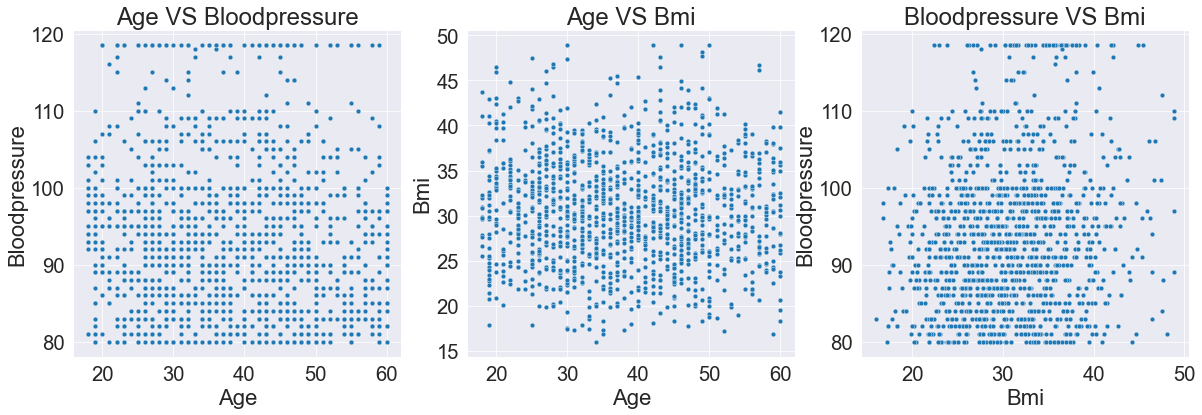

In [167]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax1);
ax1.set_xlabel('Age')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Age VS Bloodpressure', fontsize=24, loc='center')

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax2);
ax2.set_xlabel('Age')
ax2.set_ylabel('Bmi')
ax2.set_title('Age VS Bmi', fontsize=24, loc='center')

sns.scatterplot(x=df['bmi'],y=df['bloodpressure']);
ax3.set_xlabel('Bmi')
ax3.set_ylabel('Bloodpressure')
ax3.set_title('Bloodpressure VS Bmi', fontsize=24, loc='center');

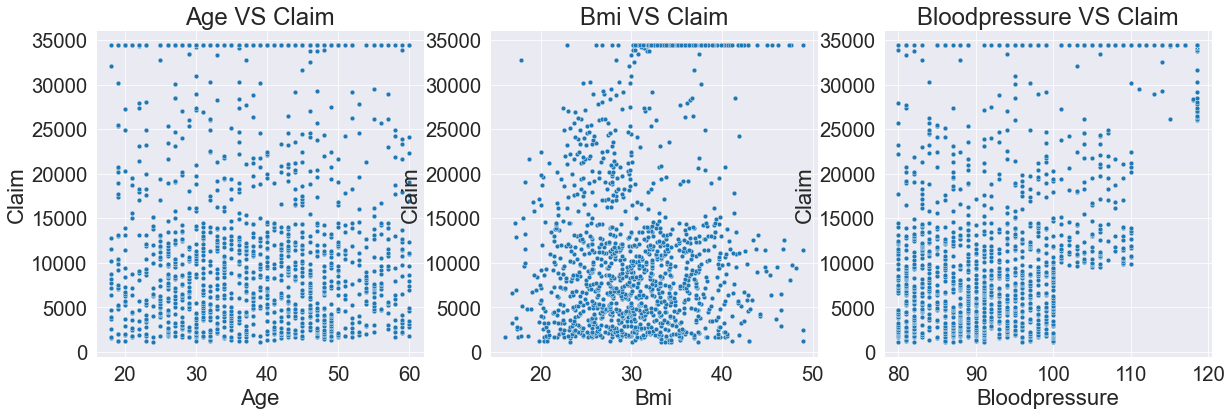

In [168]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Claim')
ax1.set_title('Age VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax2);
ax2.set_xlabel('Bmi')
ax2.set_ylabel('Claim')
ax2.set_title('Bmi VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax3);
ax3.set_xlabel('Bloodpressure')
ax3.set_ylabel('Claim')
ax3.set_title('Bloodpressure VS Claim', fontsize=24, loc='center');



In [169]:
df[num_cols].corr()

age       bmi  bloodpressure  children     claim
age            1.000000 -0.042368      -0.071450 -0.025547 -0.029839
bmi           -0.042368  1.000000       0.141014  0.012675  0.159300
bloodpressure -0.071450  0.141014       1.000000 -0.029573  0.507597
children      -0.025547  0.012675      -0.029573  1.000000  0.074492
claim         -0.029839  0.159300       0.507597  0.074492  1.000000

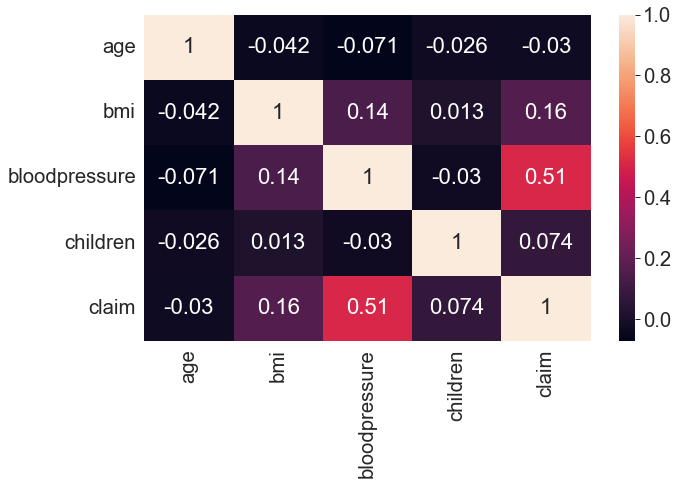

In [170]:
sns.heatmap(df[num_cols].corr(), annot=True);

### Multivariate Data Anaysis

### Cat to Cat
- gender with diabetic with smoker
- gender with children with smoker
- gender with region with smoker
- bmi_cat with diabetic with smoker
- bmi_cat with children with smoker
- bmi_cat with region with smoker
- blood_ptressure_cat with diabetic with smoker
- blood_ptressure_cat with children with smoker
- blood_ptressure_cat with region with smoker




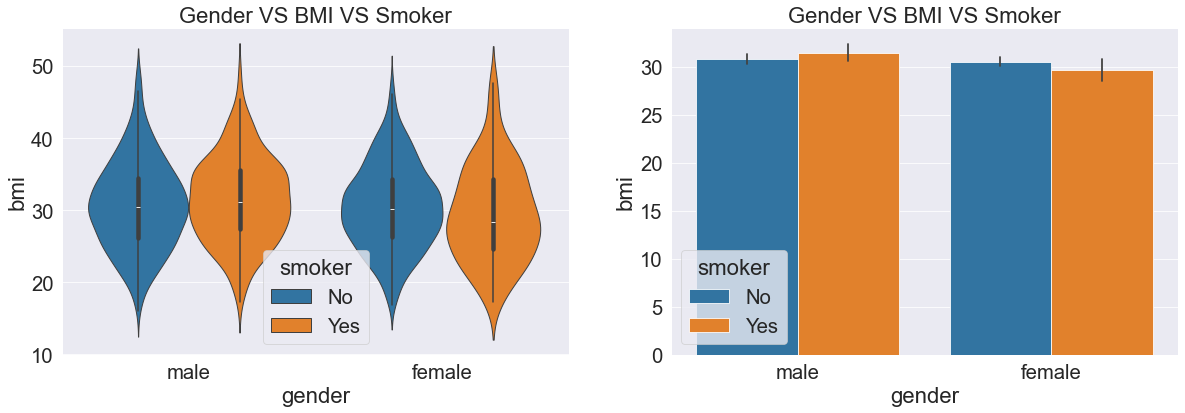

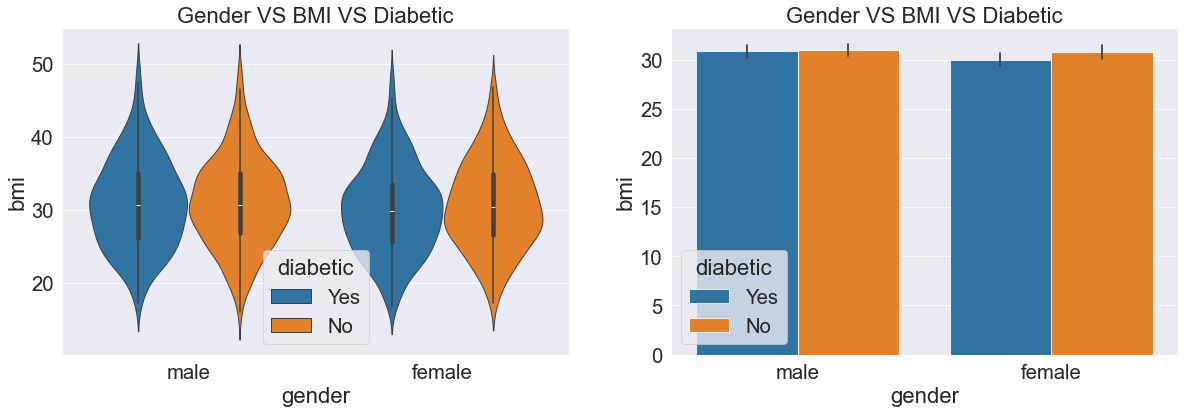

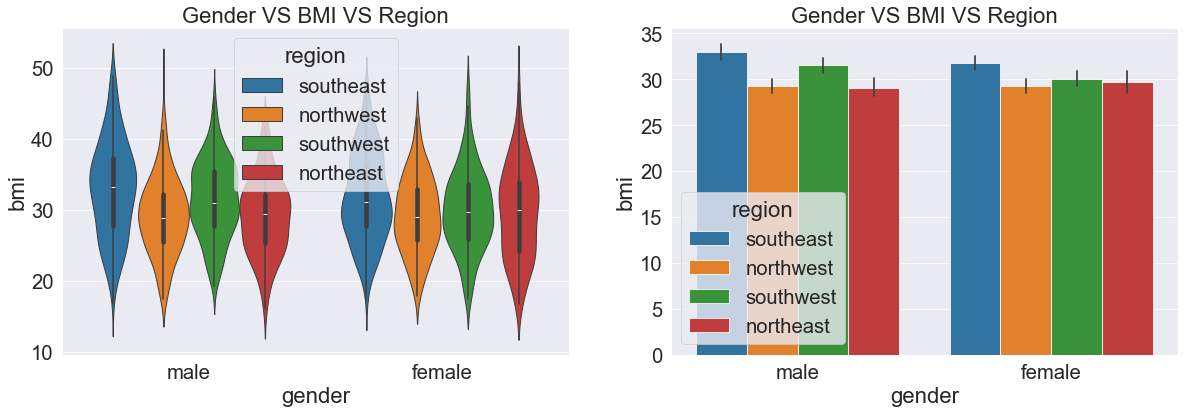

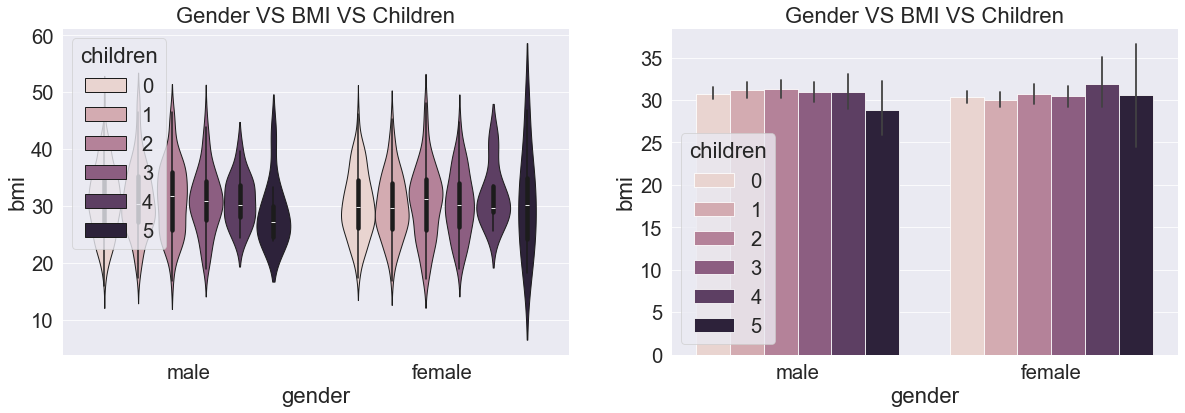

In [171]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS BMI VS Smoker')
ax2.set_title('Gender VS BMI VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS BMI VS Diabetic')
ax2.set_title('Gender VS BMI VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BMI VS Region')
ax2.set_title('Gender VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['children'],ax=ax2)
ax1.set_title('Gender VS BMI VS Children')
ax2.set_title('Gender VS BMI VS Children');

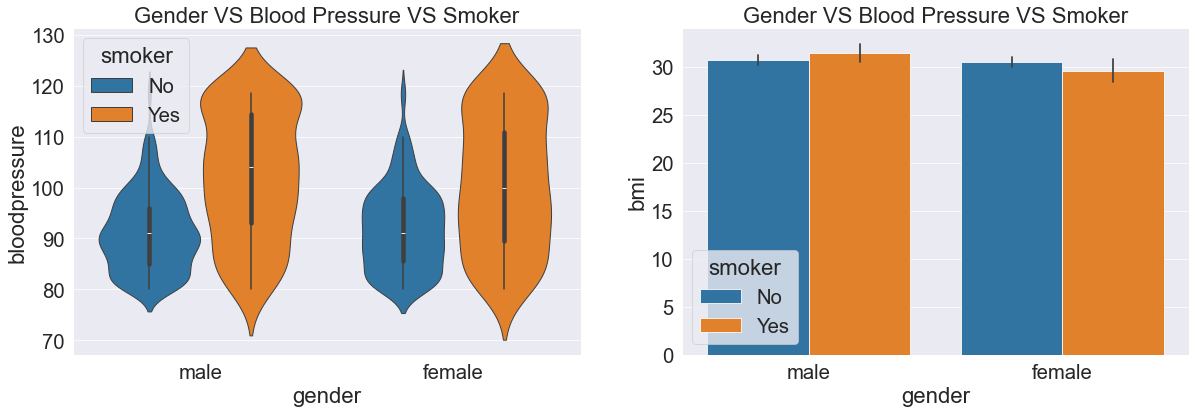

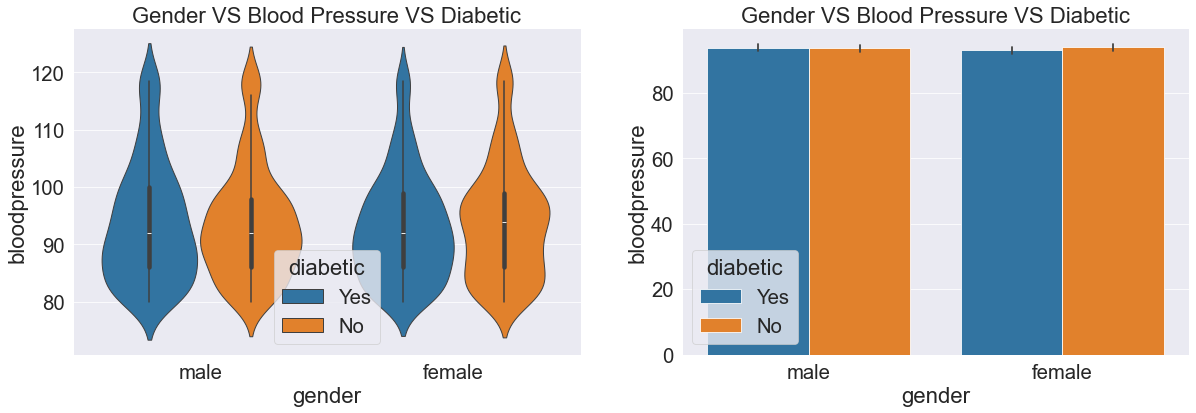

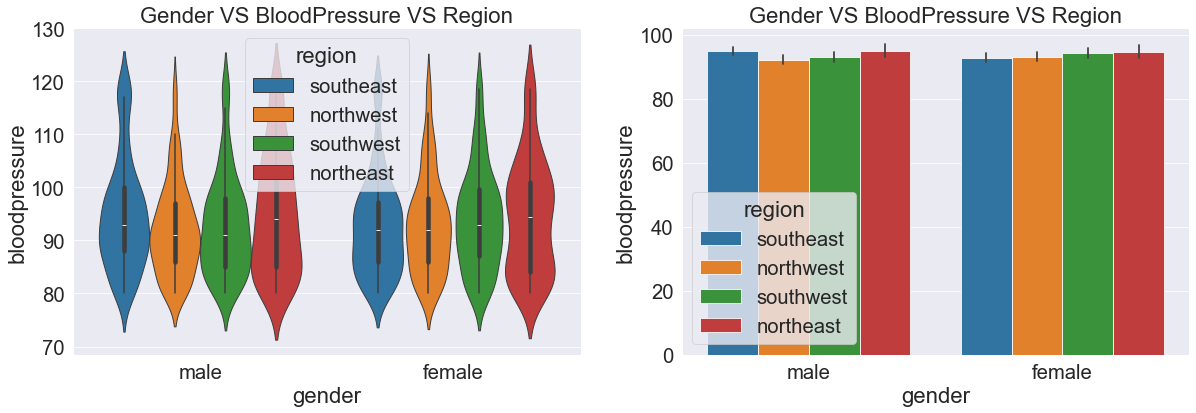

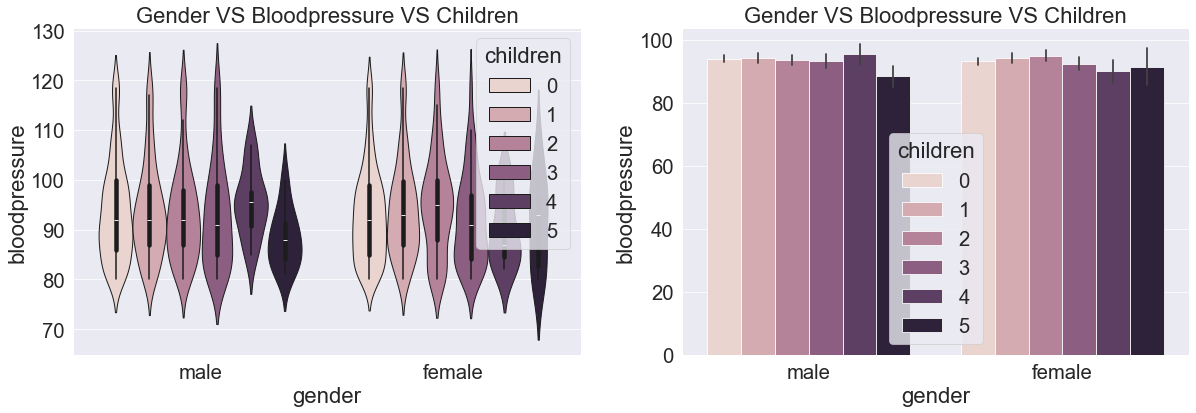

In [172]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Smoker')
ax2.set_title('Gender VS Blood Pressure VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Diabetic')
ax2.set_title('Gender VS Blood Pressure VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BloodPressure VS Region')
ax2.set_title('Gender VS BloodPressure VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
ax1.set_title('Gender VS Bloodpressure VS Children')
ax2.set_title('Gender VS Bloodpressure VS Children');

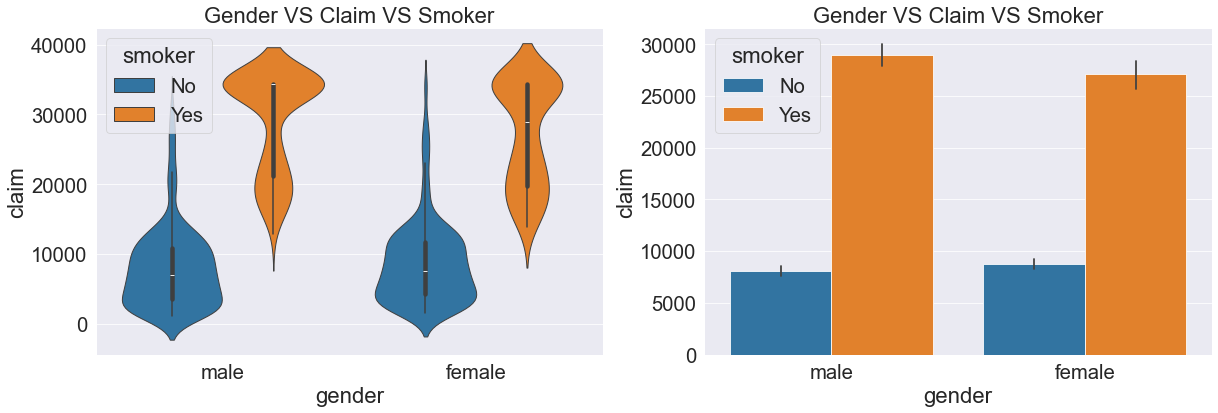

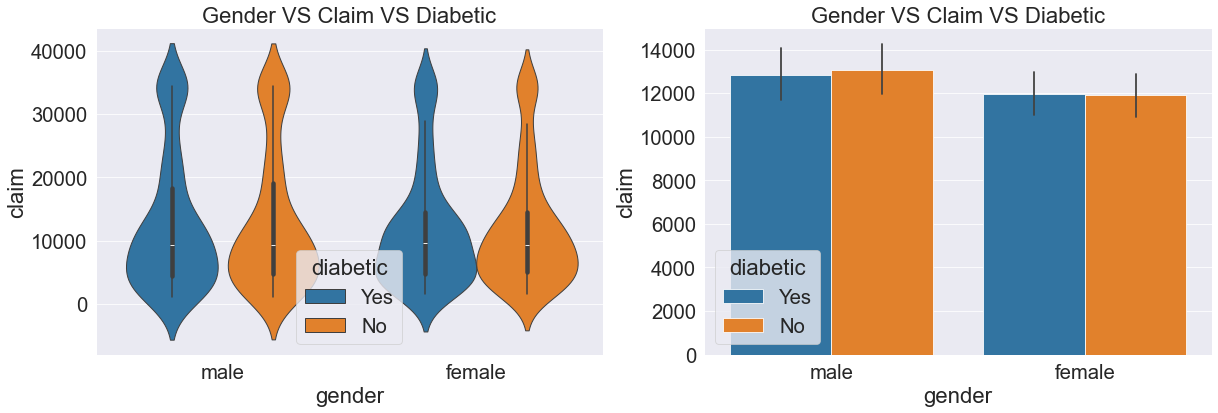

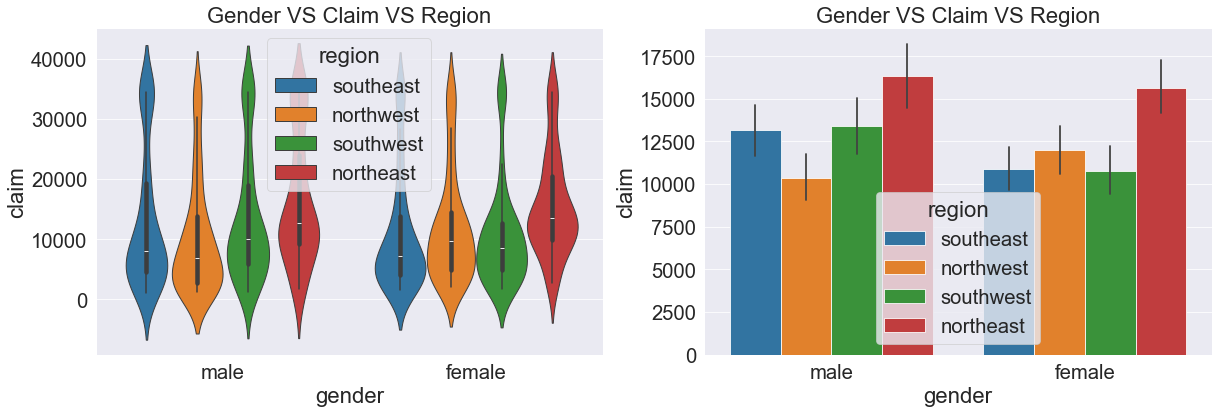

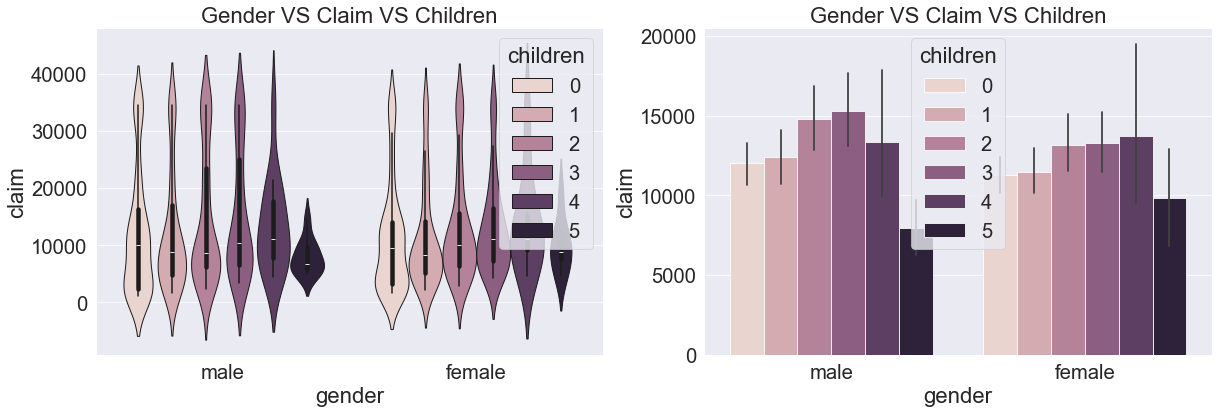

In [173]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Claim VS Smoker')
ax2.set_title('Gender VS Claim VS Smoker')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Claim VS Diabetic')
ax2.set_title('Gender VS Claim VS Diabetic')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS Claim VS Region')
ax2.set_title('Gender VS Claim VS Region')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Gender VS Claim VS Children')
ax2.set_title('Gender VS Claim VS Children');

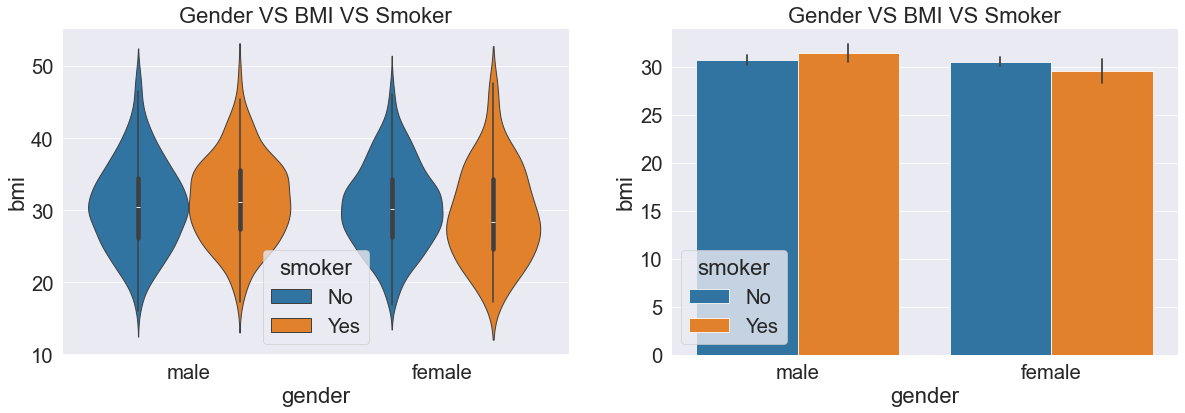

In [174]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS BMI VS Smoker')
ax2.set_title('Gender VS BMI VS Smoker');

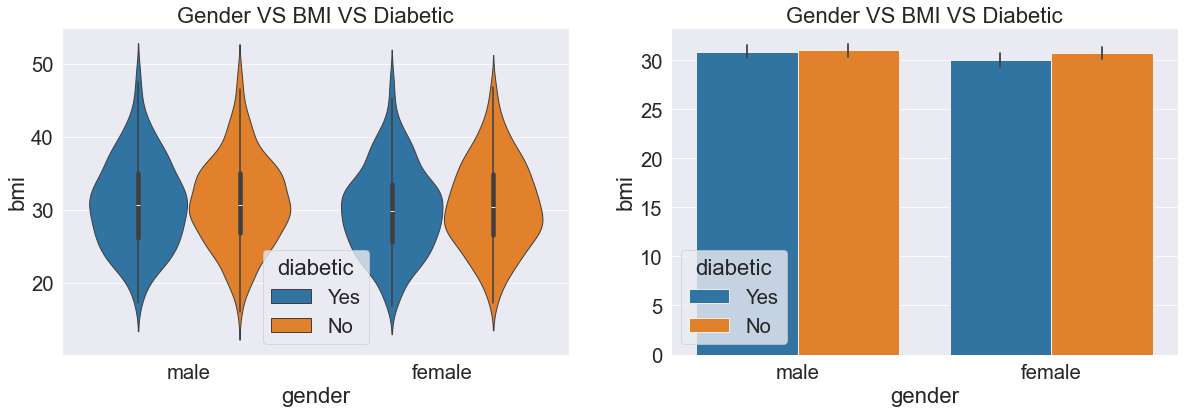

In [175]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS BMI VS Diabetic')
ax2.set_title('Gender VS BMI VS Diabetic');

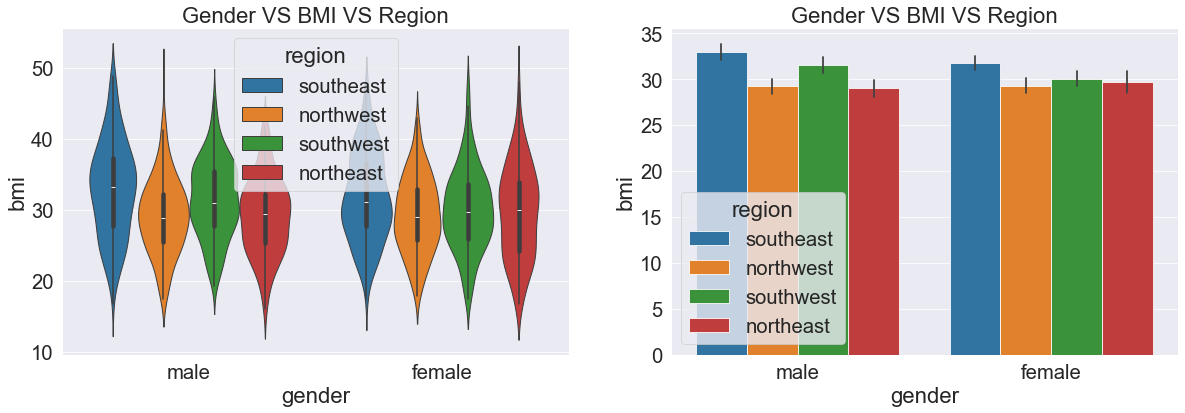

In [176]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BMI VS Region')
ax2.set_title('Gender VS BMI VS Region');

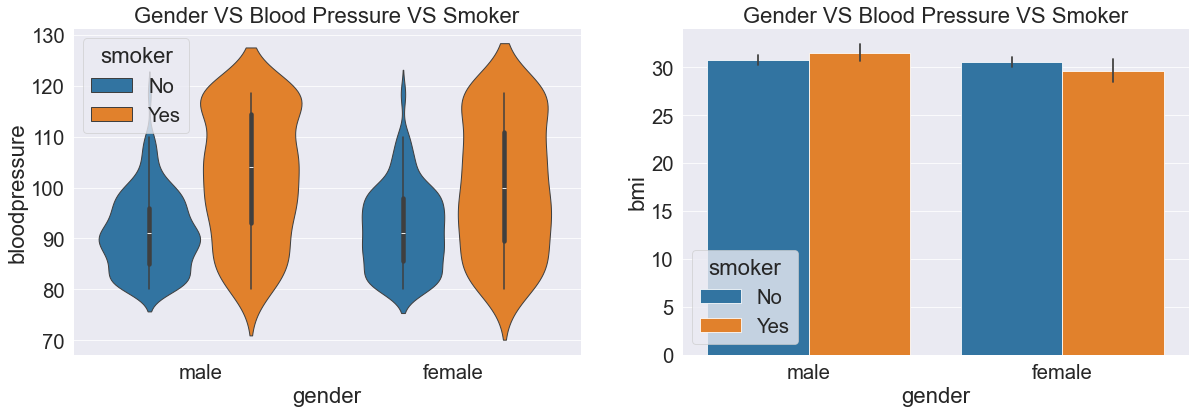

In [177]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Smoker')
ax2.set_title('Gender VS Blood Pressure VS Smoker');

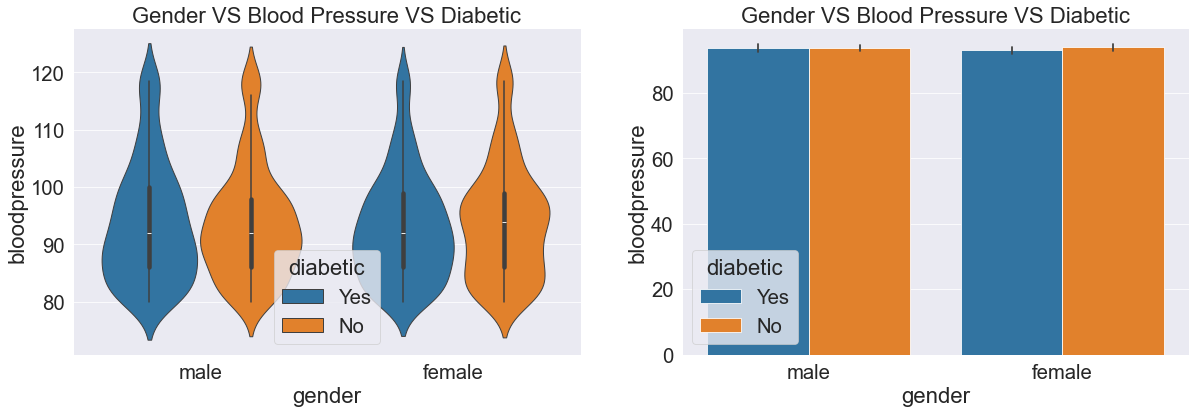

In [178]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Blood Pressure VS Diabetic')
ax2.set_title('Gender VS Blood Pressure VS Diabetic');

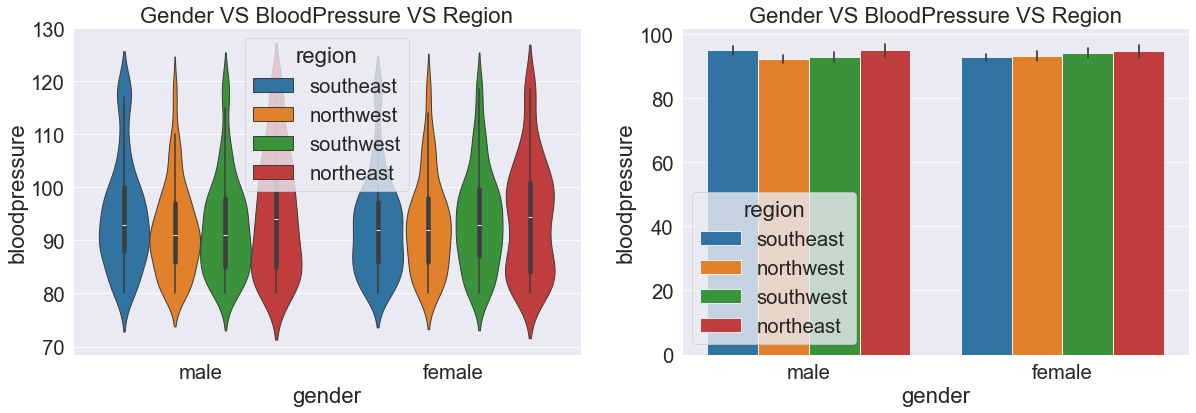

In [179]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS BloodPressure VS Region')
ax2.set_title('Gender VS BloodPressure VS Region');

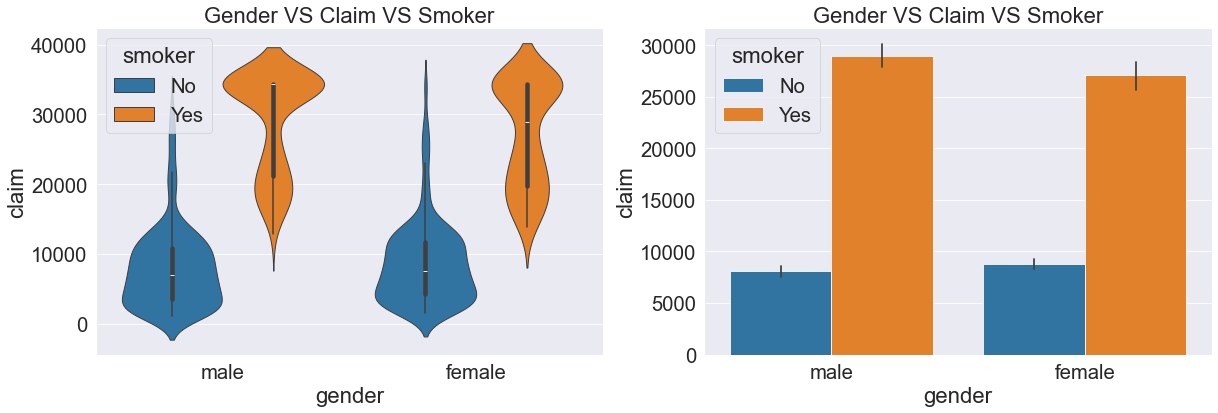

In [180]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Gender VS Claim VS Smoker')
ax2.set_title('Gender VS Claim VS Smoker');

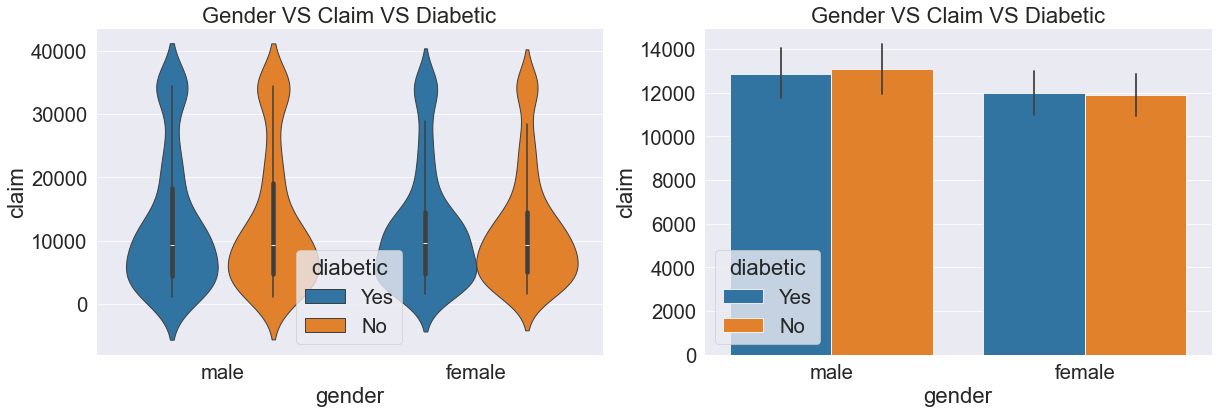

In [181]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Gender VS Claim VS Diabetic')
ax2.set_title('Gender VS Claim VS Diabetic');

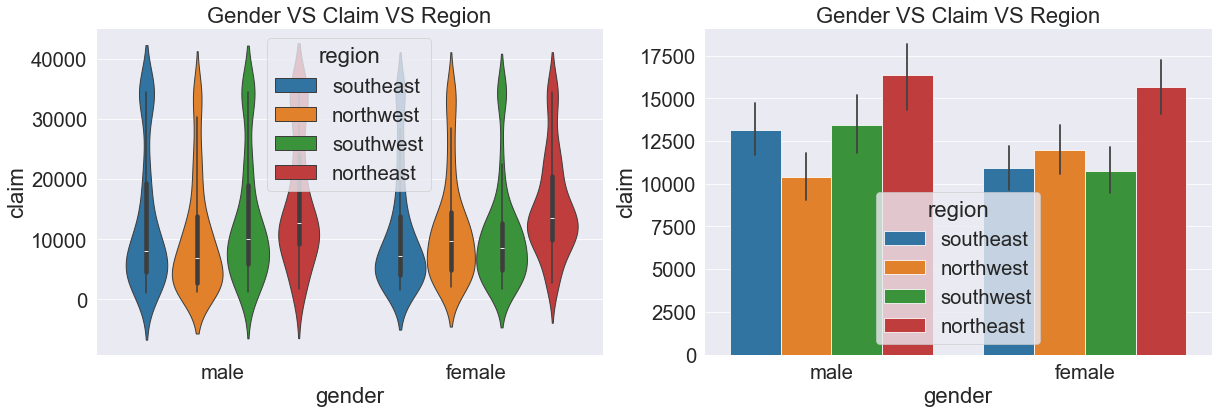

In [182]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Gender VS Claim VS Region')
ax2.set_title('Gender VS Claim VS Region');

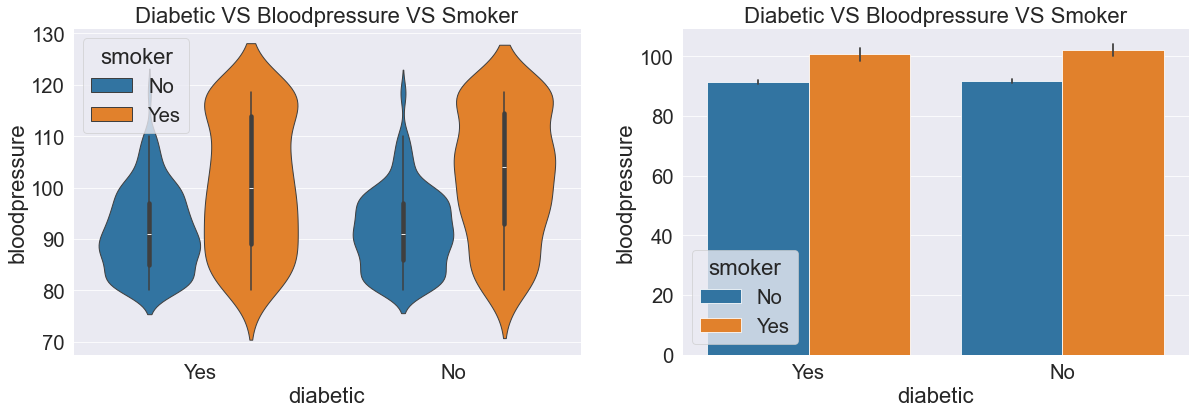

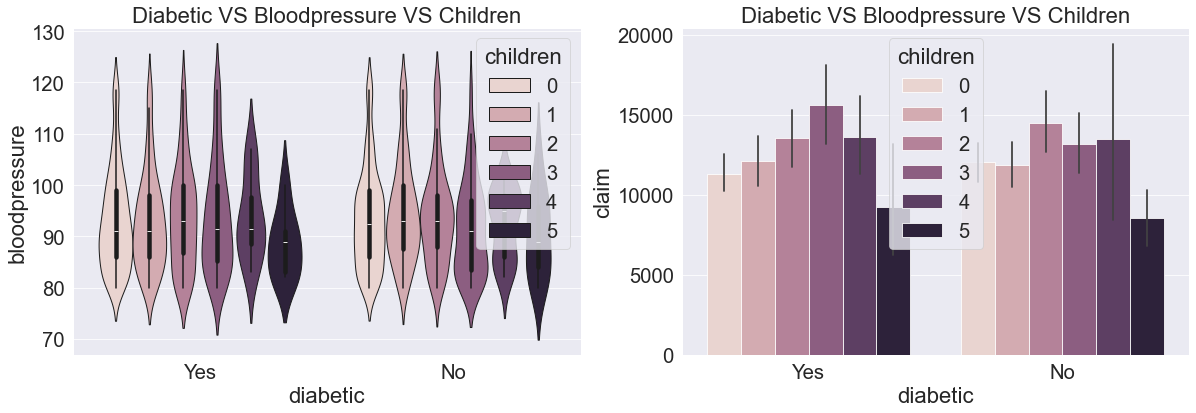

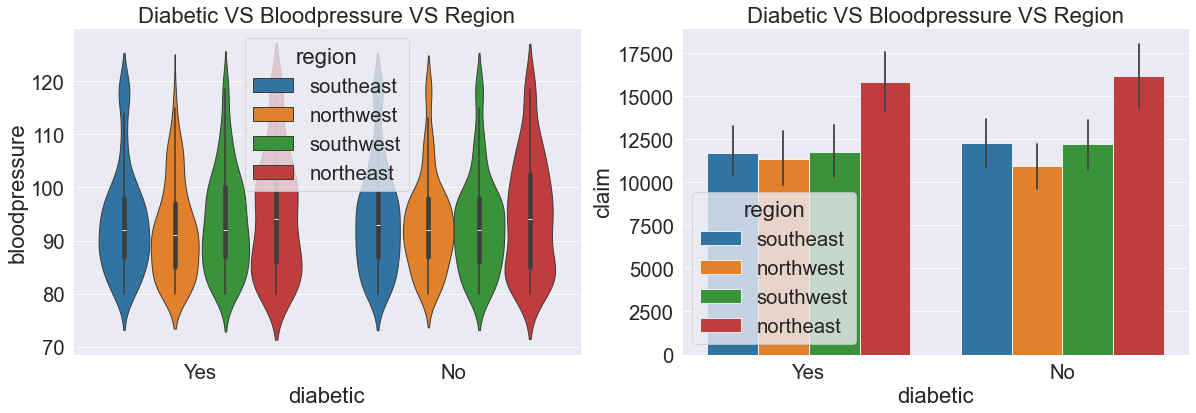

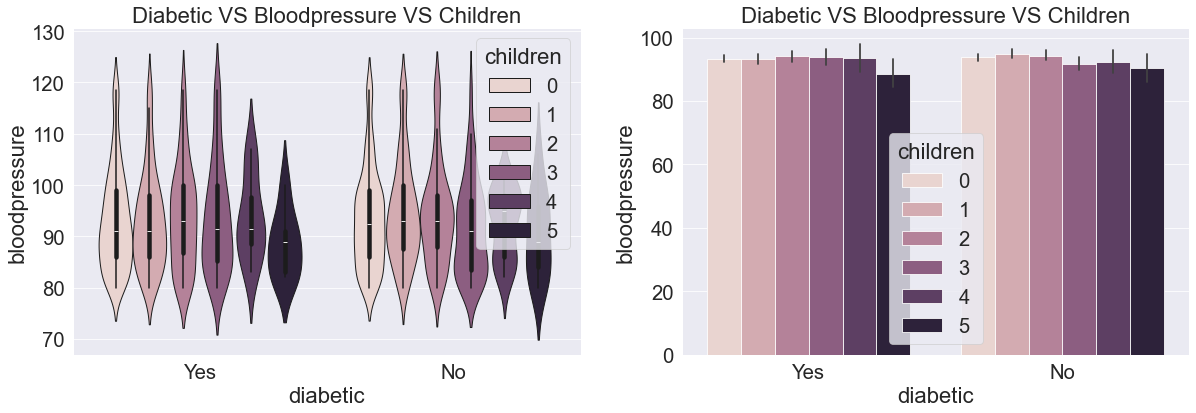

In [183]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['smoker'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Smoker')
ax2.set_title('Diabetic VS Bloodpressure VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Children')
ax2.set_title('Diabetic VS Bloodpressure VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Region')
ax2.set_title('Diabetic VS Bloodpressure VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Bloodpressure VS Children')
ax2.set_title('Diabetic VS Bloodpressure VS Children');

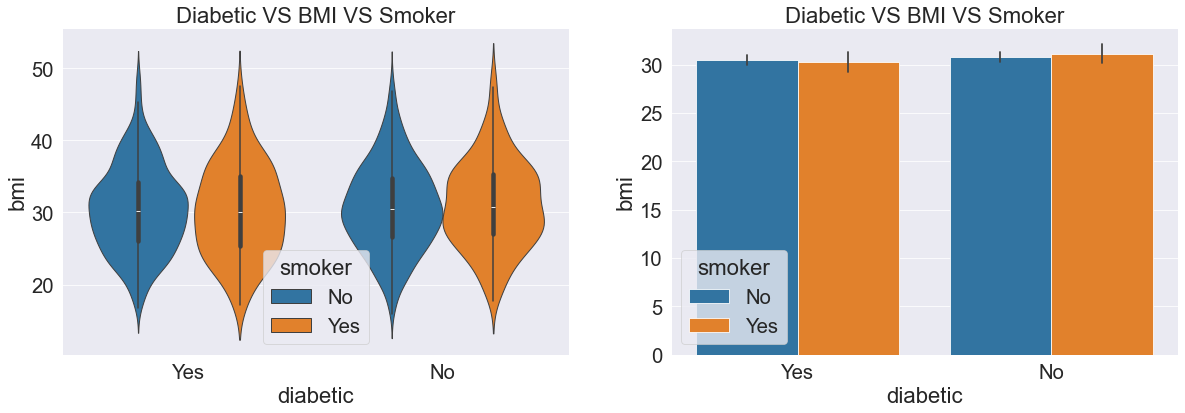

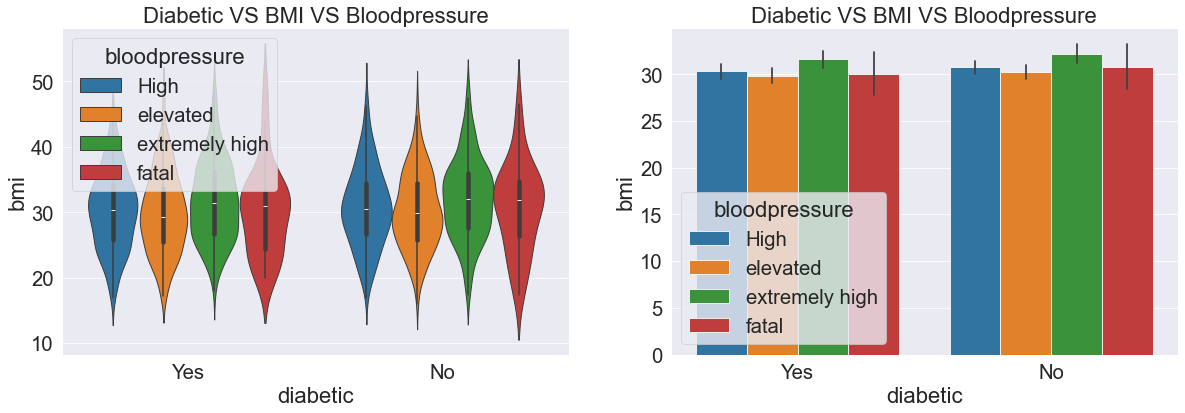

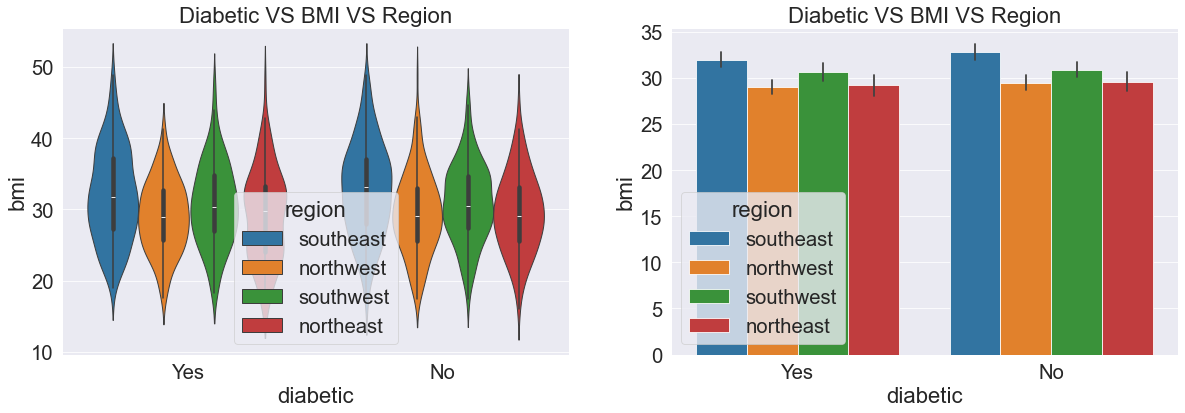

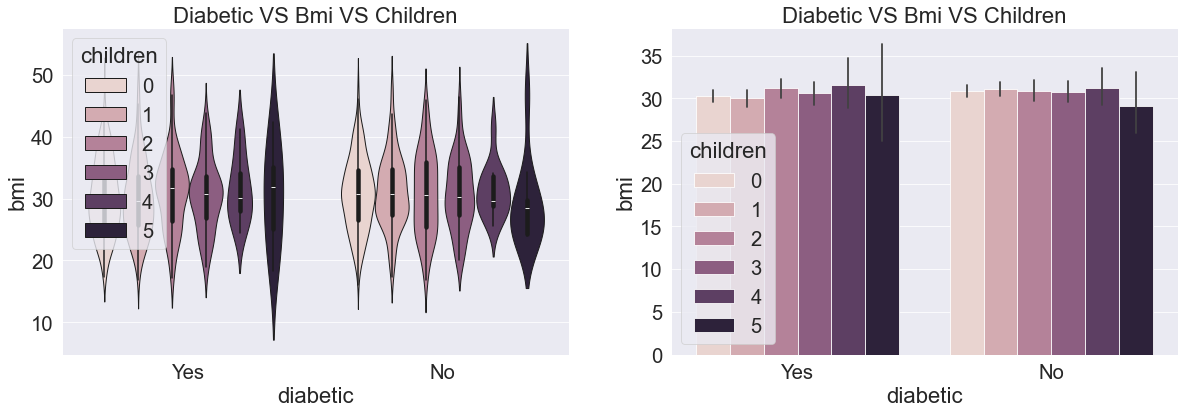

In [184]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Smoker')
ax2.set_title('Diabetic VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=cat_df['bloodpressure'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Bloodpressure')
ax2.set_title('Diabetic VS BMI VS Bloodpressure')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Region')
ax2.set_title('Diabetic VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Bmi VS Children')
ax2.set_title('Diabetic VS Bmi VS Children');

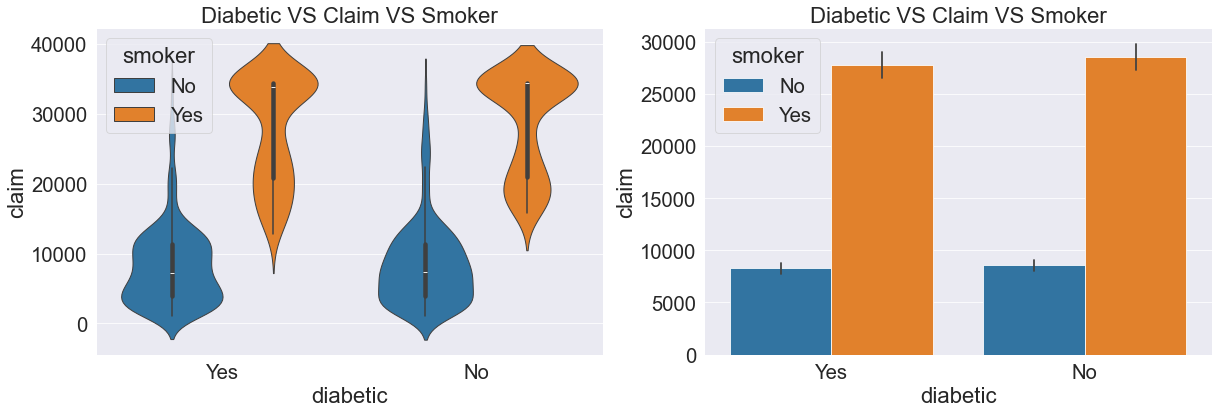

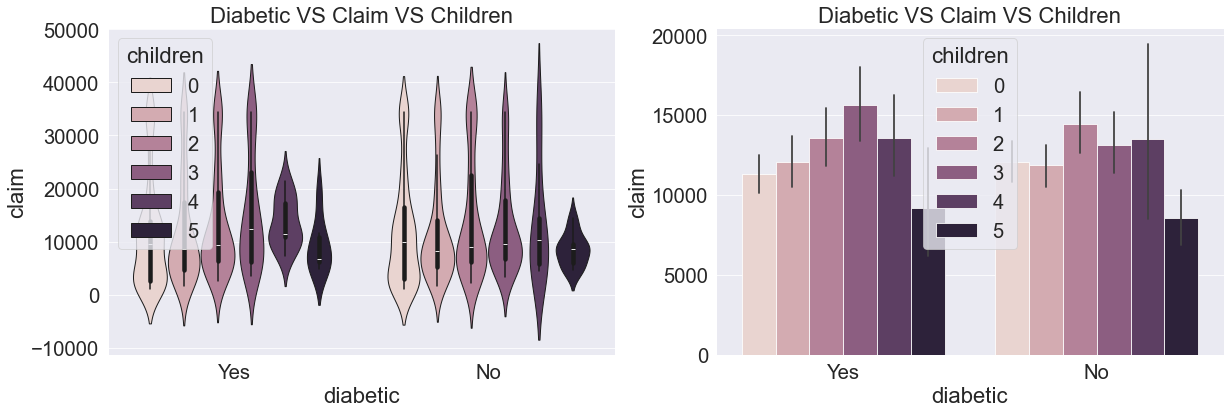

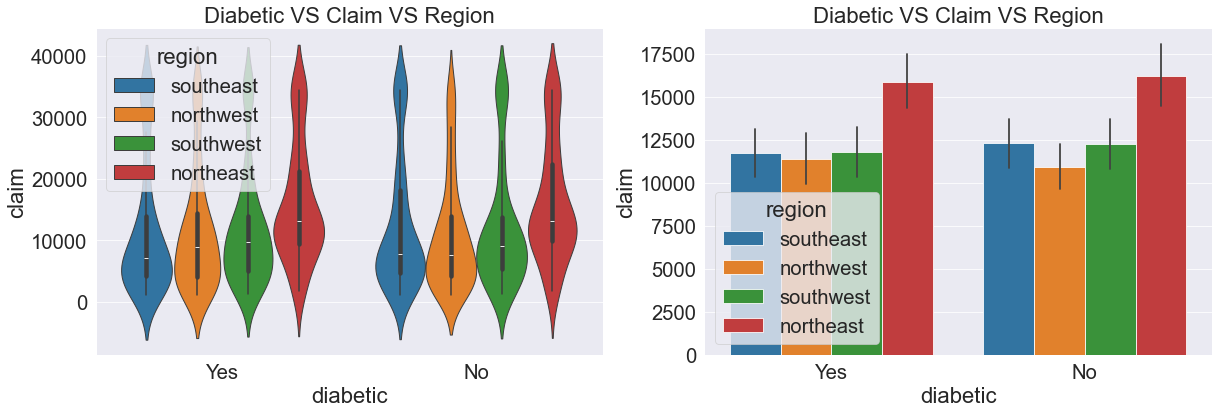

In [185]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Diabetic VS Claim VS Smoker')
ax2.set_title('Diabetic VS Claim VS Smoker')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Diabetic VS Claim VS Children')
ax2.set_title('Diabetic VS Claim VS Children')

fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS Claim VS Region')
ax2.set_title('Diabetic VS Claim VS Region');

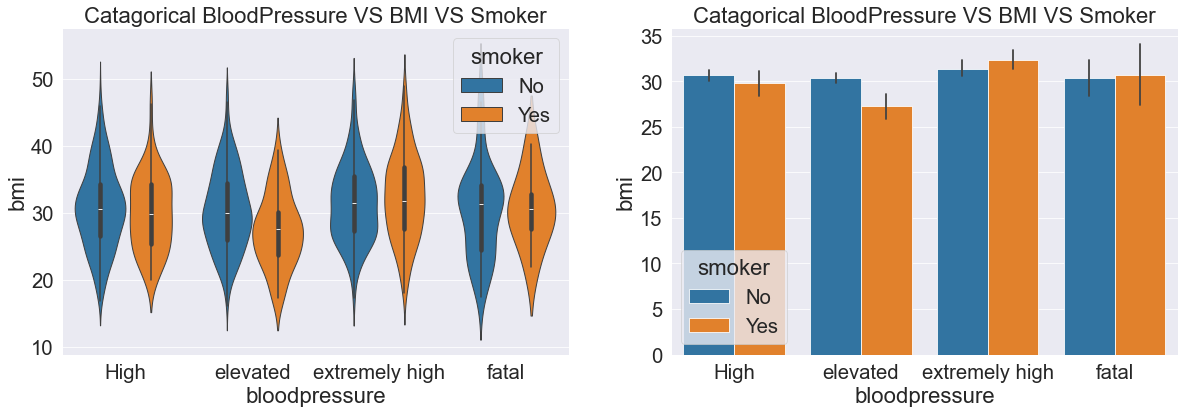

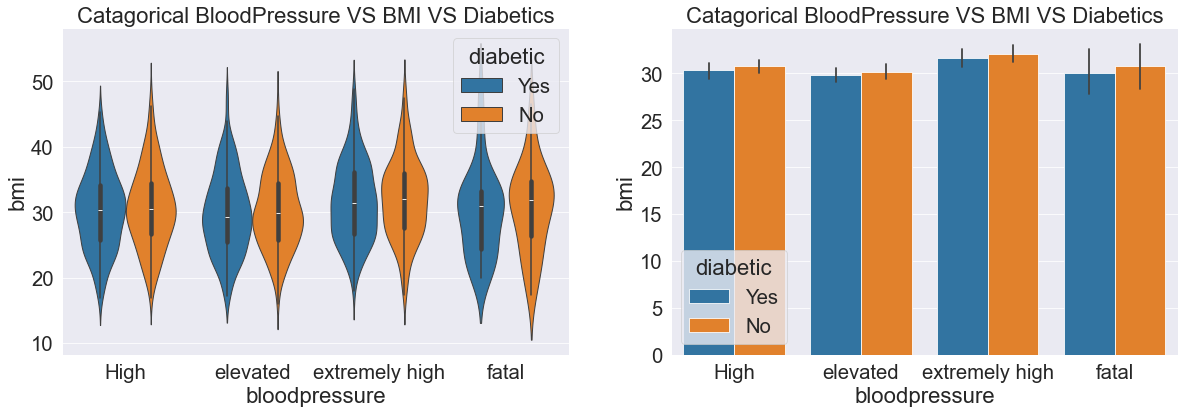

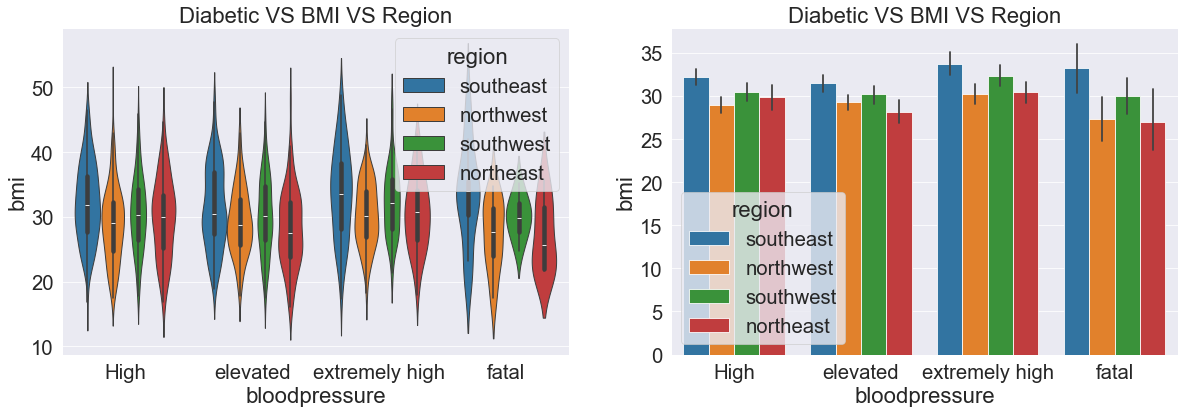

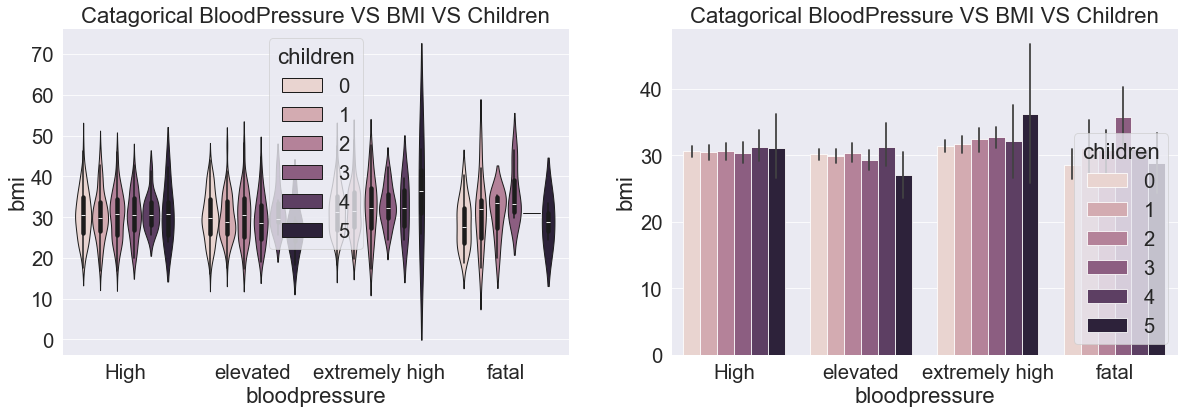

In [186]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['smoker'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS BMI VS Smoker')
ax2.set_title('Catagorical BloodPressure VS BMI VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS BMI VS Diabetics')
ax2.set_title('Catagorical BloodPressure VS BMI VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['region'],ax=ax2)
ax1.set_title('Diabetic VS BMI VS Region')
ax2.set_title('Diabetic VS BMI VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['bmi'],hue=df['children'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS BMI VS Children')
ax2.set_title('Catagorical BloodPressure VS BMI VS Children');

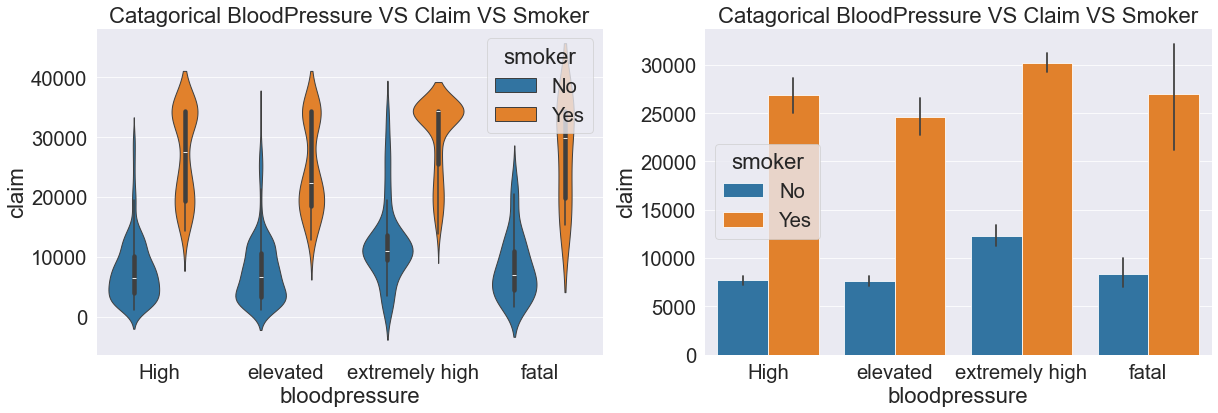

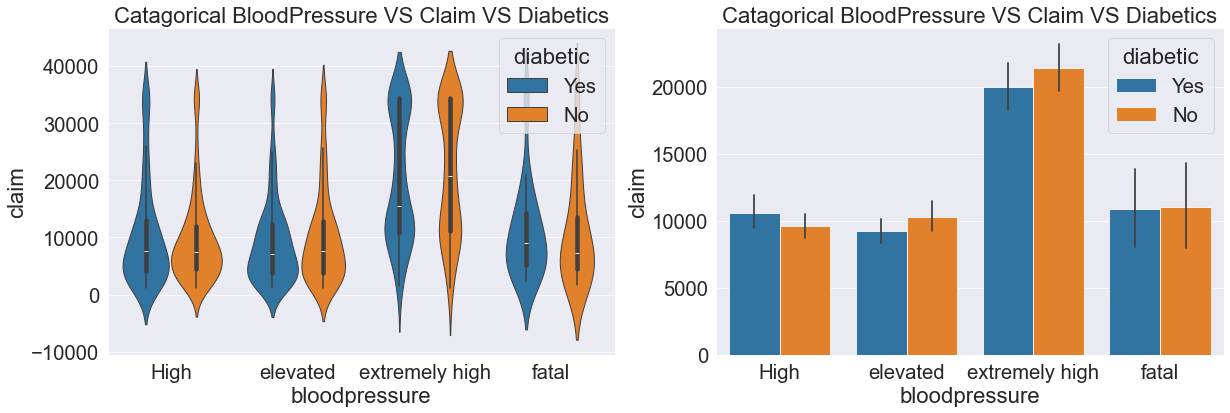

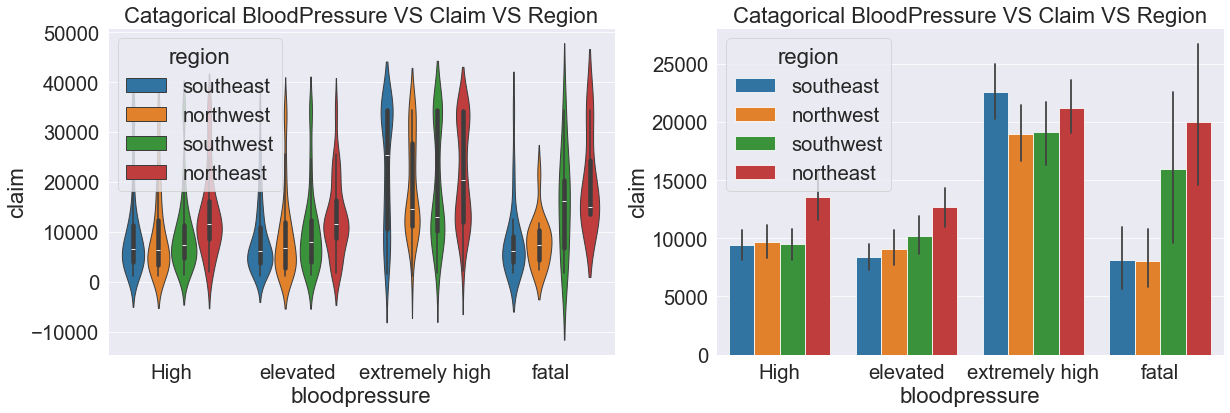

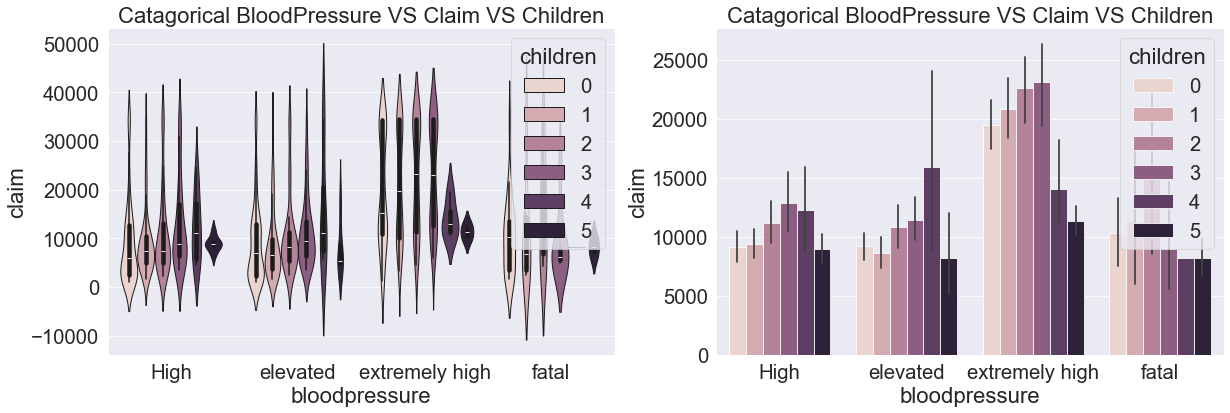

In [187]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Smoker')
ax2.set_title('Catagorical BloodPressure VS Claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Diabetics')
ax2.set_title('Catagorical BloodPressure VS Claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Region')
ax2.set_title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Children')
ax2.set_title('Catagorical BloodPressure VS Claim VS Children');

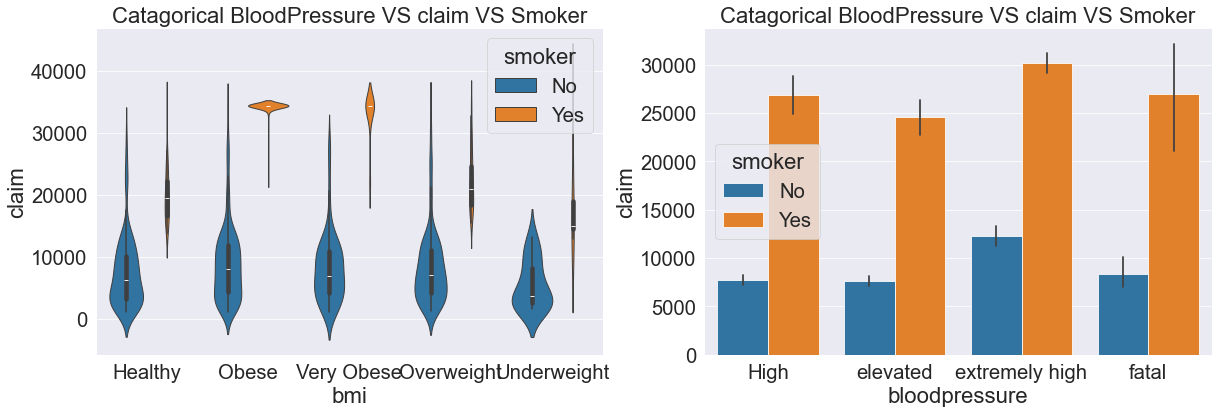

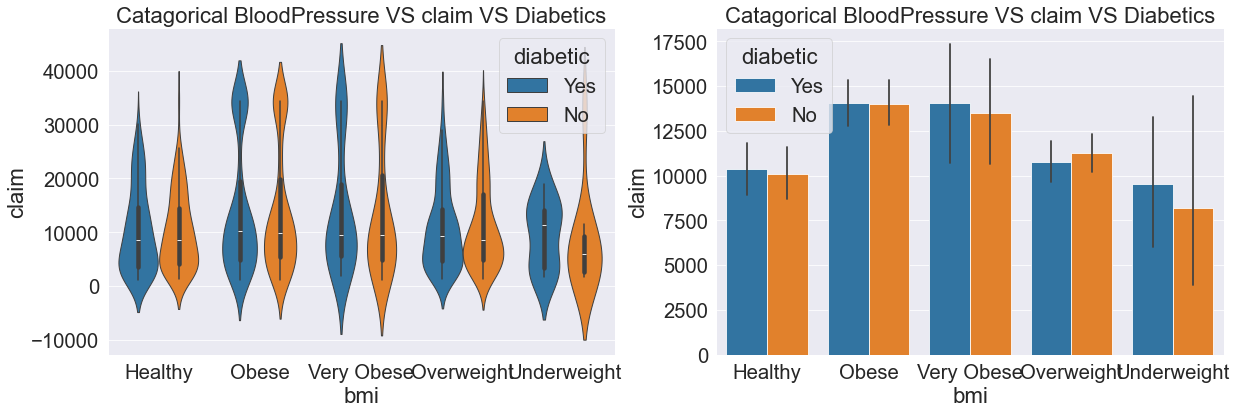

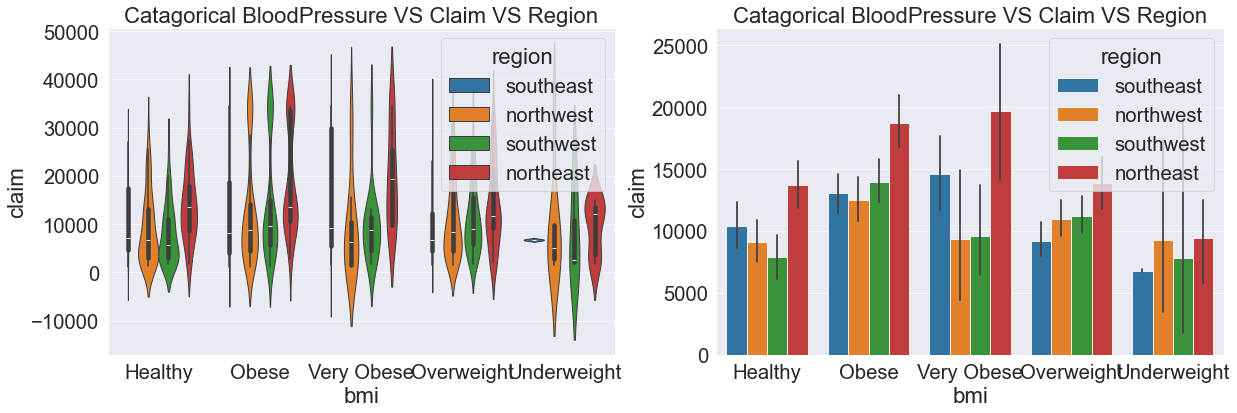

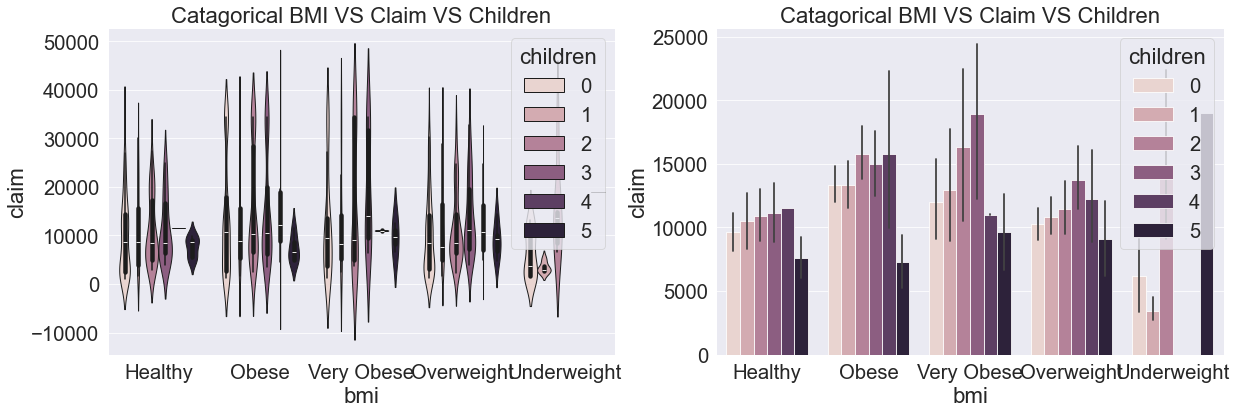

In [188]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax1)
sns.barplot(x=cat_df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS claim VS Smoker')
ax2.set_title('Catagorical BloodPressure VS claim VS Smoker')



fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS claim VS Diabetics')
ax2.set_title('Catagorical BloodPressure VS claim VS Diabetics')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['region'],ax=ax2)
ax1.set_title('Catagorical BloodPressure VS Claim VS Region')
ax2.set_title('Catagorical BloodPressure VS Claim VS Region')


fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax1)
sns.barplot(x=cat_df['bmi'],y=df['claim'],hue=df['children'],ax=ax2)
ax1.set_title('Catagorical BMI VS Claim VS Children')
ax2.set_title('Catagorical BMI VS Claim VS Children');

### Num to Num Features

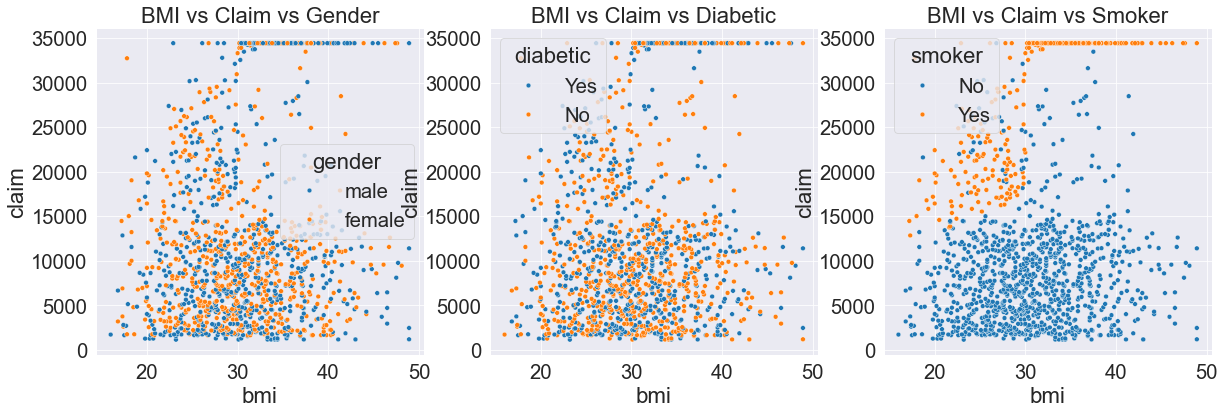

In [189]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['gender'],ax=ax1)
ax1.set_title('BMI vs Claim vs Gender')

sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax2.set_title('BMI vs Claim vs Diabetic')

sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['smoker'],ax=ax3)
ax3.set_title('BMI vs Claim vs Smoker');

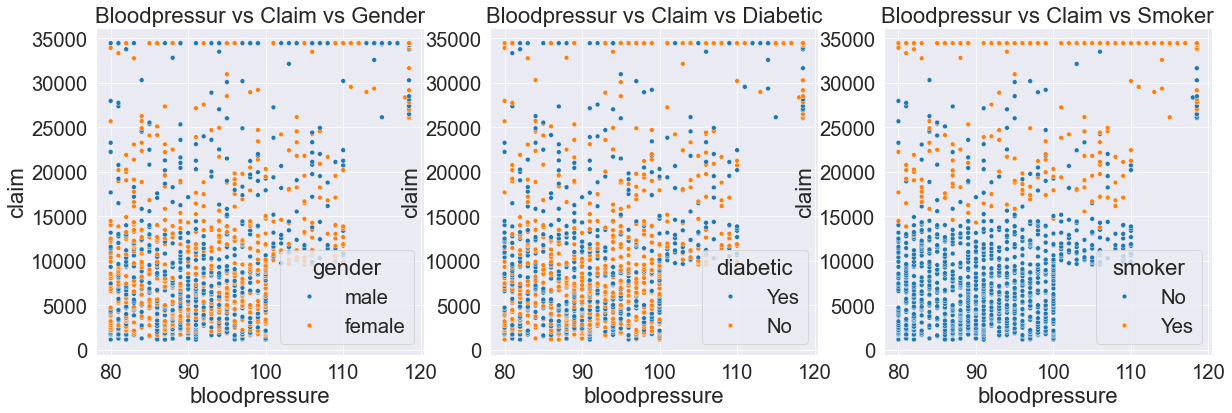

In [190]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['gender'],ax=ax1)
ax1.set_title('Bloodpressur vs Claim vs Gender')
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['diabetic'],ax=ax2)
ax2.set_title('Bloodpressur vs Claim vs Diabetic')

sns.scatterplot(x=df['bloodpressure'],y=df['claim'],hue=df['smoker'],ax=ax3);
ax3.set_title('Bloodpressur vs Claim vs Smoker');

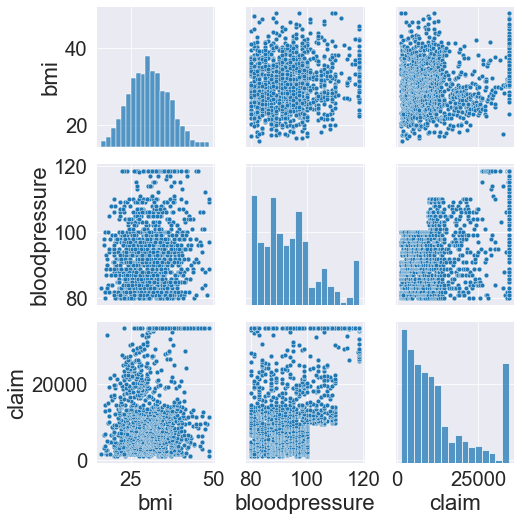

In [191]:
 sns.pairplot(df[['bmi','bloodpressure','claim']]);

In [192]:
df[['bmi','bloodpressure','claim']].corr()

bmi  bloodpressure     claim
bmi            1.000000       0.141014  0.159300
bloodpressure  0.141014       1.000000  0.507597
claim          0.159300       0.507597  1.000000

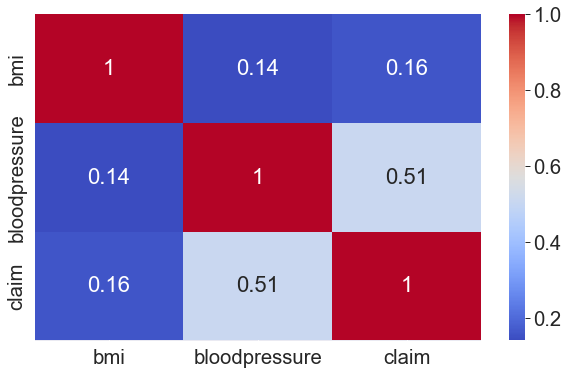

In [193]:
sns.heatmap(df[['bmi','bloodpressure','claim']].corr(),annot=True,cmap='coolwarm');

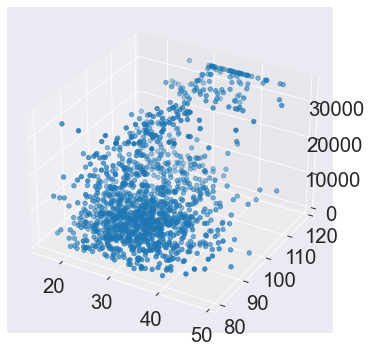

In [194]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df['bmi'],df['bloodpressure'],df['claim']);

### Feature Engineering

In [195]:
from sklearn.preprocessing import FunctionTransformer

### Log Transformation

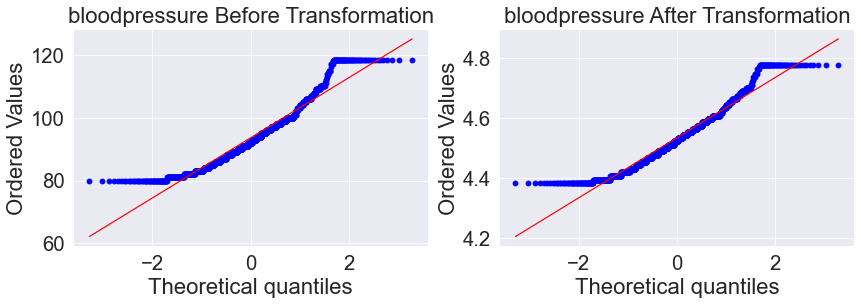

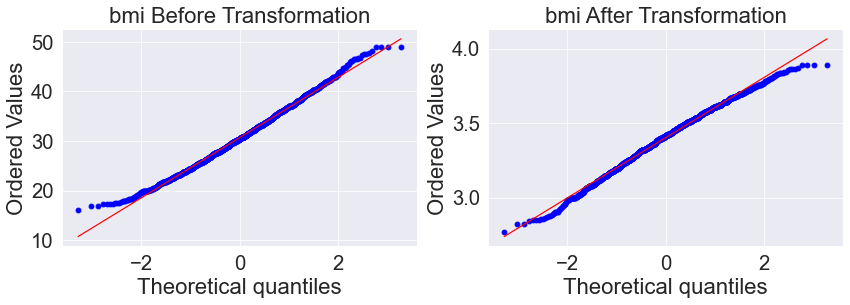

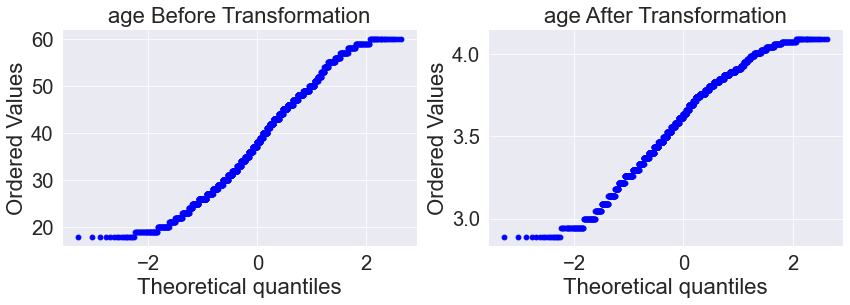

In [196]:
from copy import deepcopy 
def log_transformation(val):
    return np.log(val)
import scipy.stats as stats
num_cols = ['bloodpressure','bmi','age']
temp_df = deepcopy (df)
for col in num_cols:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'{col} Before Transformation')    
    
    temp_df[col] = df[col].apply(log_transformation)
    
    plt.subplot(122)
    stats.probplot(temp_df[col], dist="norm", plot=plt)
    plt.title(f'{col} After Transformation')
    plt.show();    

### Feature Scalling 

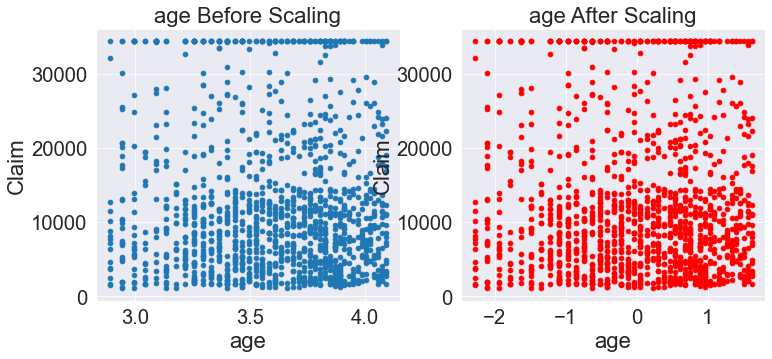

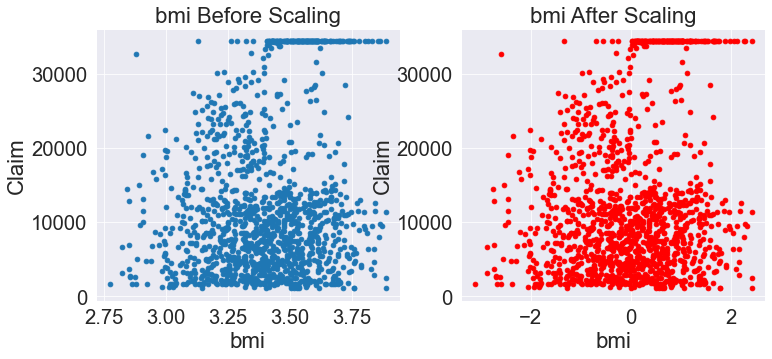

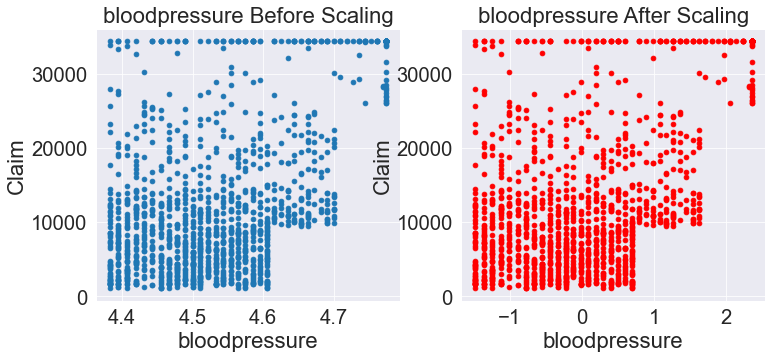

In [197]:
num_cols = ['age','bmi','bloodpressure']
for col in num_cols:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    ax1.scatter(temp_df[col], temp_df['claim'])
    ax1.set_title(f"{col} Before Scaling") 
    ax1.set_xlabel(f"{col}") 
    ax1.set_ylabel("Claim") 
    scaler = StandardScaler()
    scaler.fit(temp_df[[col]]) 
    temp_df[col] = scaler.transform(temp_df[[col]])
    ax2.scatter(temp_df[col], temp_df['claim'],color='red')
    ax2.set_title(f"{col} After Scaling")
    ax2.set_xlabel(f"{col}") 
    ax2.set_ylabel("Claim") 
    plt.show();

### Model Building and Training

In [198]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [199]:
# Splitting the data
X = temp_df.drop(columns=['claim'])
y = temp_df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# Categorical columns and preprocessor
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]
# Defining the pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])



In [201]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [202]:
x_train

array([[-0.41564771, -0.58485125,  2.05655455, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.09387952, -0.773599  , -1.12526795, ...,  1.        ,
         0.        ,  0.        ],
       [-0.41564771,  1.28864462,  0.29451538, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.03418318,  0.0242153 ,  2.34909109, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.05455402,  0.52220467, -1.00841083, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.09387952,  1.64329133,  1.26139014, ...,  0.        ,
         1.        ,  0.        ]])

In [203]:
model = LinearRegression()

In [204]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Evaluating the model

In [205]:
def r2_adjusted_score(r2,rows,cols):
    return 1 - ( ((1-r2)*(rows-1))/(rows-1-cols))

In [206]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
Adjusted_R2_Score = r2_adjusted_score(r2,x_train.shape[0],x_train.shape[1])

### Displaying the evaluation metrics

In [208]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Adjusted R2 squared:", Adjusted_R2_Score)

Mean Absolute Error: 3976.657911788052
Mean Squared Error: 28247983.751481805
Root Mean Squared Error: 5314.8832302772
R-squared: 0.7420975377597215
Adjusted R2 squared: 0.7399119236729395


# Assumptions of Linear Regression

### 1. Linear Relationship

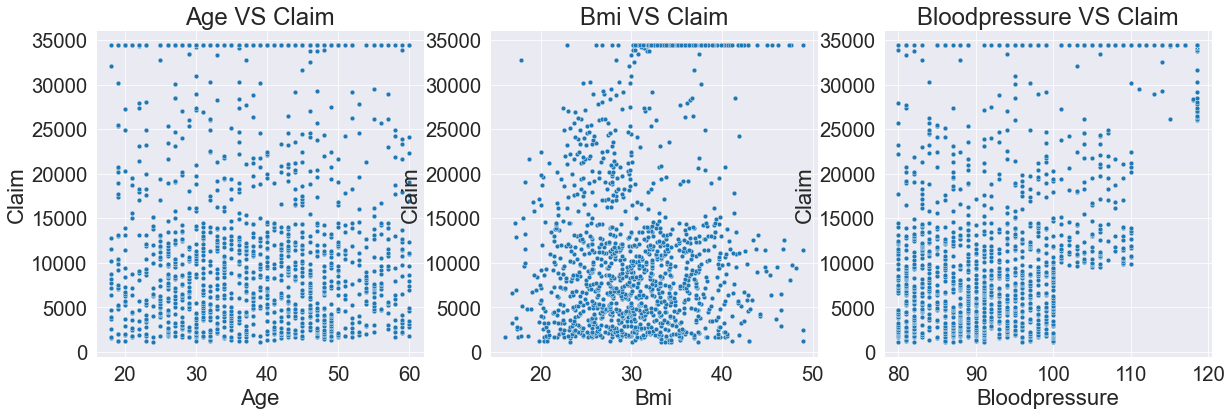

In [209]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Claim')
ax1.set_title('Age VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax2);
ax2.set_xlabel('Bmi')
ax2.set_ylabel('Claim')
ax2.set_title('Bmi VS Claim', fontsize=24, loc='center');

sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax3);
ax3.set_xlabel('Bloodpressure')
ax3.set_ylabel('Claim')
ax3.set_title('Bloodpressure VS Claim', fontsize=24, loc='center');

### 2. Multicollinearity

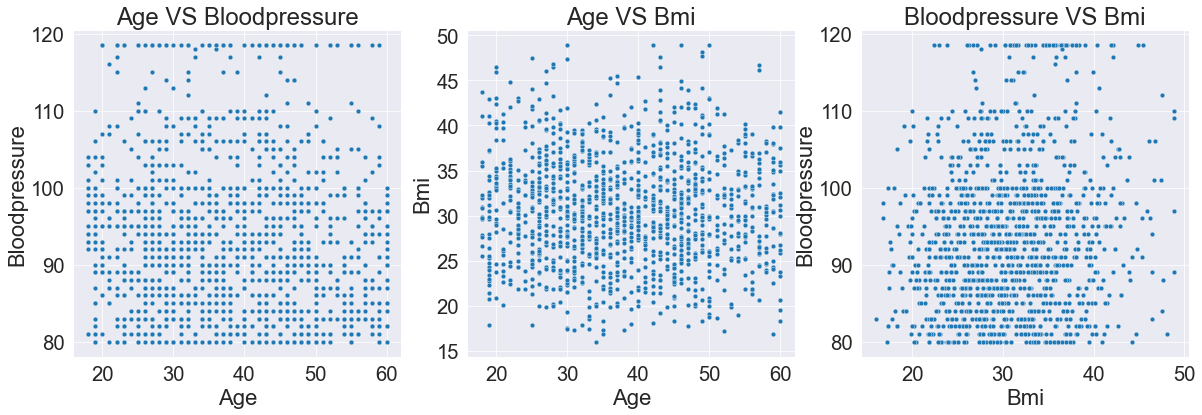

In [210]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2,ax3) = fig.subplots(1,3)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax1);
ax1.set_xlabel('Age')
ax1.set_ylabel('Bloodpressure')
ax1.set_title('Age VS Bloodpressure', fontsize=24, loc='center')

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax2);
ax2.set_xlabel('Age')
ax2.set_ylabel('Bmi')
ax2.set_title('Age VS Bmi', fontsize=24, loc='center')

sns.scatterplot(x=df['bmi'],y=df['bloodpressure']);
ax3.set_xlabel('Bmi')
ax3.set_ylabel('Bloodpressure')
ax3.set_title('Bloodpressure VS Bmi', fontsize=24, loc='center');

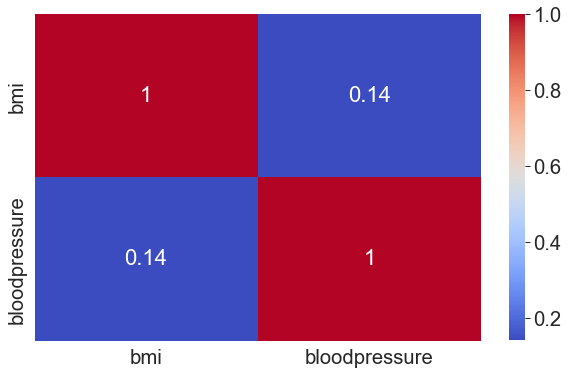

In [211]:
sns.heatmap(df[['bmi','bloodpressure']].corr(),annot=True,cmap='coolwarm');

> <h3>Assumption of Linear Regression:</h3> <h3>There is No Correlation between Input Features</h3>

### 3. Normality of Residual

In [212]:
residual = y_test - y_pred

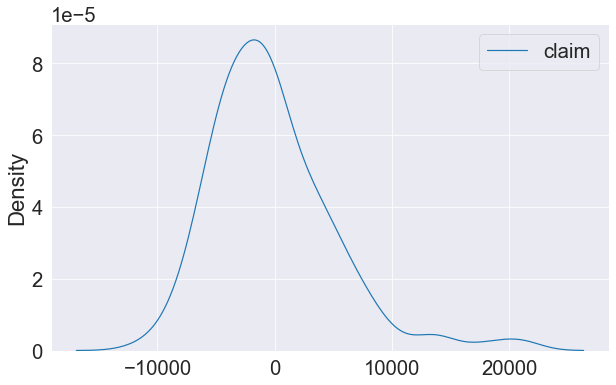

In [213]:
sns.kdeplot(residual);

In [214]:
residual.skew()

claim    1.272474
dtype: float64

### 4. Homoscedasticity

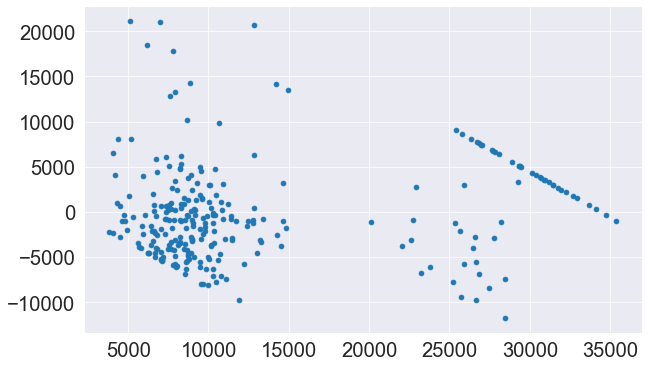

In [215]:
plt.scatter(y_pred,residual);

### 5. Autocorrelation of Residuals

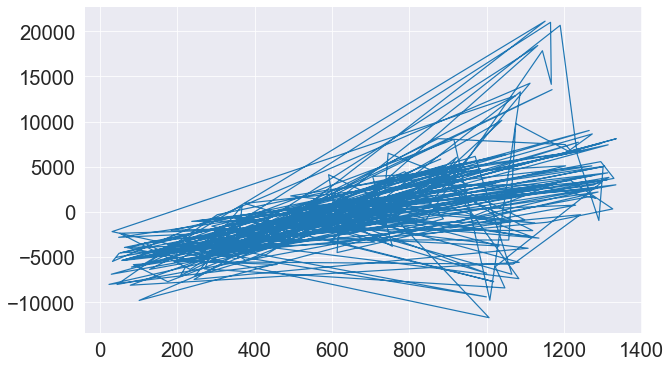

In [216]:
plt.plot(residual);

**Observation**
- We observed that some assumptions are not fulfilling the requirements of linear Regression so we will see result may be affect by linear Regression.  

### Feature Engineering Complete Pipe Line

In [217]:
X = df.drop(columns=['claim'])
y = df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linearregression', LinearRegression())
])



In [219]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Model Evaluation

In [220]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Displaying the evaluation metrics

In [221]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 3977.5556261912407
Mean Squared Error: 28249168.157854572
Root Mean Squared Error: 5314.99465266472
R-squared: 0.7420867241978575


### Model Optimization By RandomSearch and GridSearch

In [222]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [223]:
X = df.drop(columns=['claim'])
y = df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])



In [225]:
x_train = pipeline.fit_transform(x_train)

x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [226]:
x_train

array([[-0.44070268, -0.56247294,  2.04764915, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08447342, -0.75017028, -1.12027673, ...,  1.        ,
         0.        ,  0.        ],
       [-0.44070268,  1.31326799,  0.29200231, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.05697262,  0.04492428,  2.33940286, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03247216,  0.54334842, -1.00412501, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08447342,  1.67056452,  1.25500019, ...,  0.        ,
         1.        ,  0.        ]])

In [227]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_predictions = linear_reg.predict(x_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
print("Linear Regression Mean Absolute Error:", linear_reg_mae)

Linear Regression Mean Absolute Error: 3977.5556261912407


### Ridge Regression

In [228]:
ridge = Ridge()
ridge_parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 0.01 ,0.001,0.0001,1, 1, 1.5,  5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor_grid = GridSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor_random = RandomizedSearchCV(ridge, ridge_parameters, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

ridge_regressor_grid.fit(x_train, y_train)
ridge_regressor_random.fit(x_train, y_train)

ridge_grid_predictions = ridge_regressor_grid.best_estimator_.predict(x_test)
ridge_random_predictions = ridge_regressor_random.best_estimator_.predict(x_test)

ridge_grid_mae = mean_absolute_error(y_test, ridge_grid_predictions)
ridge_random_mae = mean_absolute_error(y_test, ridge_random_predictions)



In [229]:
print("Ridge Regression Grid Search Mean Absolute Error:", ridge_grid_mae)
print("Ridge Regression Random Search Mean Absolute Error:", ridge_random_mae)


Ridge Regression Grid Search Mean Absolute Error: 3986.6635647720636
Ridge Regression Random Search Mean Absolute Error: 3986.6635647720636


In [230]:
ridge_regressor_random.best_params_

{'alpha': 1}

### Lasso Regression

In [231]:
lasso = Lasso()
lasso_parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor_grid = GridSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor_random = RandomizedSearchCV(lasso, lasso_parameters, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

lasso_regressor_grid.fit(x_train, y_train)
lasso_regressor_random.fit(x_train, y_train)

lasso_grid_predictions = lasso_regressor_grid.best_estimator_.predict(x_test)
lasso_random_predictions = lasso_regressor_random.best_estimator_.predict(x_test)

lasso_grid_mae = mean_absolute_error(y_test, lasso_grid_predictions)
lasso_random_mae = mean_absolute_error(y_test, lasso_random_predictions)


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+10, tolerance: 8.713e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+10, tolerance: 8.888e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [232]:
print("Lasso Regression Grid Search Mean Absolute Error:", lasso_grid_mae)
print("Lasso Regression Random Search Mean Absolute Error:", lasso_random_mae)

Lasso Regression Grid Search Mean Absolute Error: 4002.187453492
Lasso Regression Random Search Mean Absolute Error: 4002.187453492


### ElasticNet Regression

In [233]:
elasticnet = ElasticNet()
elasticnet_parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
elasticnet_regressor_grid = GridSearchCV(elasticnet, elasticnet_parameters, scoring='neg_mean_squared_error', cv=5)
elasticnet_regressor_random = RandomizedSearchCV(elasticnet, elasticnet_parameters, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42)

elasticnet_regressor_grid.fit(x_train, y_train)
elasticnet_regressor_random.fit(x_train, y_train)

elasticnet_grid_predictions = elasticnet_regressor_grid.best_estimator_.predict(x_test)
elasticnet_random_predictions = elasticnet_regressor_random.best_estimator_.predict(x_test)

elasticnet_grid_mae = mean_absolute_error(y_test, elasticnet_grid_predictions)
elasticnet_random_mae = mean_absolute_error(y_test, elasticnet_random_predictions)


C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.413e+10, tolerance: 8.713e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+10, tolerance: 8.888e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

In [234]:
print("ElasticNet Regression Grid Search Mean Absolute Error:", elasticnet_grid_mae)
print("ElasticNet Regression Random Search Mean Absolute Error:", elasticnet_random_mae)

ElasticNet Regression Grid Search Mean Absolute Error: 3984.403208013201
ElasticNet Regression Random Search Mean Absolute Error: 3980.5002951971655


<h3> Choose the best model based on Mean Squared Error </h3><br></br>

In [235]:

best_model = min([
    ("Linear Regression", linear_reg_mae),
    ("Ridge Regression (Grid Search)", ridge_grid_mae),
    ("Ridge Regression (Random Search)", ridge_random_mae),
    ("Lasso Regression (Grid Search)", lasso_grid_mae),
    ("Lasso Regression (Random Search)", lasso_random_mae),
    ("ElasticNet Regression (Grid Search)", elasticnet_grid_mae),
    ("ElasticNet Regression (Random Search)", elasticnet_random_mae)
], key=lambda x: x[1])

print(f"\nBest Model: {best_model[0]}")
print(f"Best Model Mean Absolute Error: {best_model[1]}")




Best Model: Linear Regression
Best Model Mean Absolute Error: 3977.5556261912407


**Observation**
- Results are not very good with these algorithims so now will apply some other algorithims and techniques to improve accuracy

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

In [237]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

In [238]:
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
rf.fit(x_train,y_train)
gb.fit(x_train,y_train)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1976\964659536.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [239]:
y_pred_dt = dt.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gb = gb.predict(x_test)

In [240]:
print("R^2 score for DT",r2_score(y_test,y_pred_dt))
print("R^2 score for KNN",r2_score(y_test,y_pred_knn))
print("R^2 score for RF",r2_score(y_test,y_pred_rf))
print("R^2 score for GBoosting",r2_score(y_test,y_pred_gb))

R^2 score for DT 0.5612742672701003
R^2 score for KNN 0.6059264697763801
R^2 score for RF 0.7781688860610818
R^2 score for GBoosting 0.8083903660183535


In [241]:
print("mean_absolute_error for DT",mean_absolute_error(y_test,y_pred_dt))
print("mean_absolute_error for KNN",mean_absolute_error(y_test,y_pred_knn))
print("mean_absolute_error for RF",mean_absolute_error(y_test,y_pred_rf))
print("mean_absolute_error for GBoosting",mean_absolute_error(y_test,y_pred_gb))

mean_absolute_error for DT 4565.997052238809
mean_absolute_error for KNN 4565.235384328359
mean_absolute_error for RF 3402.5759470149287
mean_absolute_error for GBoosting 3259.393326453008


### Ensemble Learning Techniques
- Voting
- Boosting
- Bagging

<h2 align='center'> Voting Ensemble</h2>

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [243]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()

In [244]:
estimators = [('lr',lr),('dt',dt),('svr',svr)]

In [245]:
from sklearn.ensemble import VotingRegressor

In [246]:
vr = VotingRegressor(estimators)
scores = cross_val_score(vr,x_train,y_train,scoring='r2',cv=10)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was pass

In [247]:
print("Voting Regressor",np.round(np.mean(scores),2))

Voting Regressor 0.6


<h2 align='center'> Bagging Ensemble <h2/>

In [248]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(x_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(random_state=1)

In [252]:
Y_preds = bag_regressor.predict(x_test)
print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(x_train, y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(x_test, y_test))

Training Coefficient of R^2 : 0.946
Test Coefficient of R^2 : 0.759


In [253]:
regressor = GradientBoostingRegressor()

In [254]:
regressor.fit(x_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [255]:
y_pred = regressor.predict(x_test)

### Model Evaluation

In [256]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

### Displaying the evaluation metrics

In [257]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2-squared:", r2)

Mean Absolute Error: 3259.393326453008
Mean Squared Error: 20986949.02066587
Root Mean Squared Error: 4581.151495057315
R2-squared: 0.8083903660183533


**Observation**
- As GradientBoostingRegressor has given Best results so we will deploy aour model with GradientBoostingRegressor

### Feature Enginering PipeLine

In [258]:
numeric_cols = [0, 2, 3]
categorical_cols = [1,4,6,7]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transformer', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('BaggingRegressor',GradientBoostingRegressor())
    
])


In [259]:
X = df.drop(columns=['claim'])
y = df[['claim']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [260]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Deploying  Model 

In [261]:
import pickle
pickle.dump(pipeline,open('insurance.pkl','wb'))

In [262]:
pipe = pickle.load(open('insurance.pkl','rb'))

In [263]:
# Assume user inpu
test_input2 = np.array([28, 'male',35.8, 97.0, 'No', 2, 'No','southwest'],dtype=object).reshape(1,8)

In [264]:
pipe.predict(test_input2)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([7421.05141892])

In [ ]:
!streamlit run app.py

**Conclusion:**

After a thorough analysis of various regression models for predicting insurance claims, it is evident that the task is inherently complex, and traditional linear models struggled to capture the underlying patterns within the data. While models such as Linear Regression, Lasso, Elastic Net, Ridge, and even ensemble methods showed limited success, it was the Gradient Boosting Regressor that exhibited superior performance.

**Key Findings:**

- The predictive power of traditional linear models fell short in capturing the intricate relationships present in the insurance claim dataset.
  
- Among the models tested, Gradient Boosting Regressor emerged as the most robust performer, achieving an R-squared score of 0.8084 on the test samples.

- The ensemble approach, through the voting ensemble, did not surpass the predictive accuracy achieved by the Gradient Boosting Regressor in this specific context.

**Implications:**

- The superior performance of Gradient Boosting Regressor suggests that the non-linear relationships and interactions within the features are critical for accurate insurance claim predictions.

- The limitations observed in other models underline the importance of employing sophisticated algorithms capable of handling complex patterns inherent in insurance data.

**Recommendations:**

- Based on the results, it is recommended to prioritize the implementation of the Gradient Boosting Regressor for future insurance claim prediction tasks.

- Further exploration of feature engineering and potential enhancements to the dataset may contribute to refining predictive models.

**Future Work:**

- Future iterations of this project could involve experimenting with advanced feature engineering techniques, exploring additional data sources, or considering more sophisticated machine learning architectures.

In conclusion, while the challenges in predicting insurance claims are substantial, the success of Gradient Boosting Regressor underscores the potential for improvement in predictive modeling within the insurance domain.
